# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as mn
import warnings
warnings.filterwarnings('ignore')

# Problem Statement

## Consider only the below columns and prepare a prediction model for predicting Price.

Model -- model of the car

Price -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

## Importing Dataset

In [4]:
raw_data=pd.read_csv('F:\ExcelR Assingment\Csv Files\Multi Linear Regression/ToyotaCorolla.csv',encoding='latin1')
raw_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
print('Number of Rows{}Columns'.format(raw_data.shape))

Number of Rows(1436, 38)Columns


In [6]:
raw_data=raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## Descriptive Analysis

In [7]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


## Checking for Data types

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


## Renaming the columns name and making it short

In [9]:
data=raw_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Checking for missing values

In [10]:
data[data.values==0.0]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


Observation: Notice there are no '0' values in the dataset

In [11]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

## Visualizing Missing Values

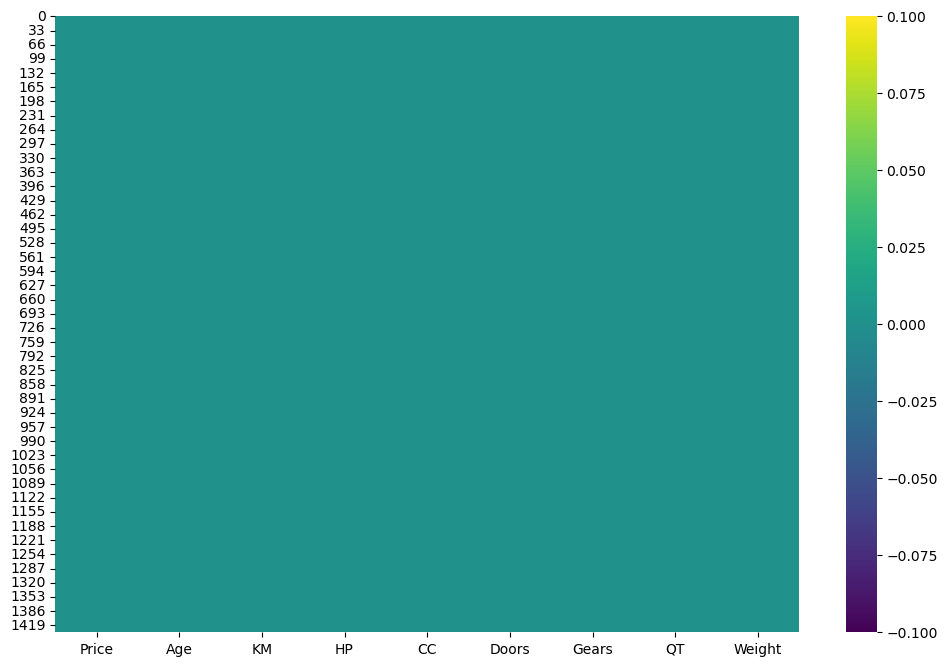

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis');

# Observation: Feature 'HP' has missing Values in the data set
    
## We will have to handle the missing values by observing the distribution and making the optimal choice

In [13]:
data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

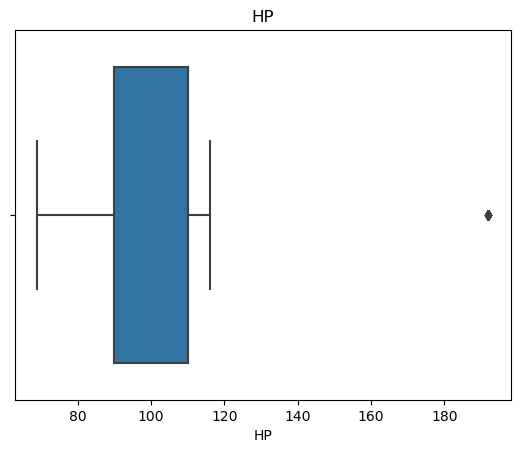

In [14]:
sns.boxplot(data['HP'])
plt.title('HP')
plt.show()

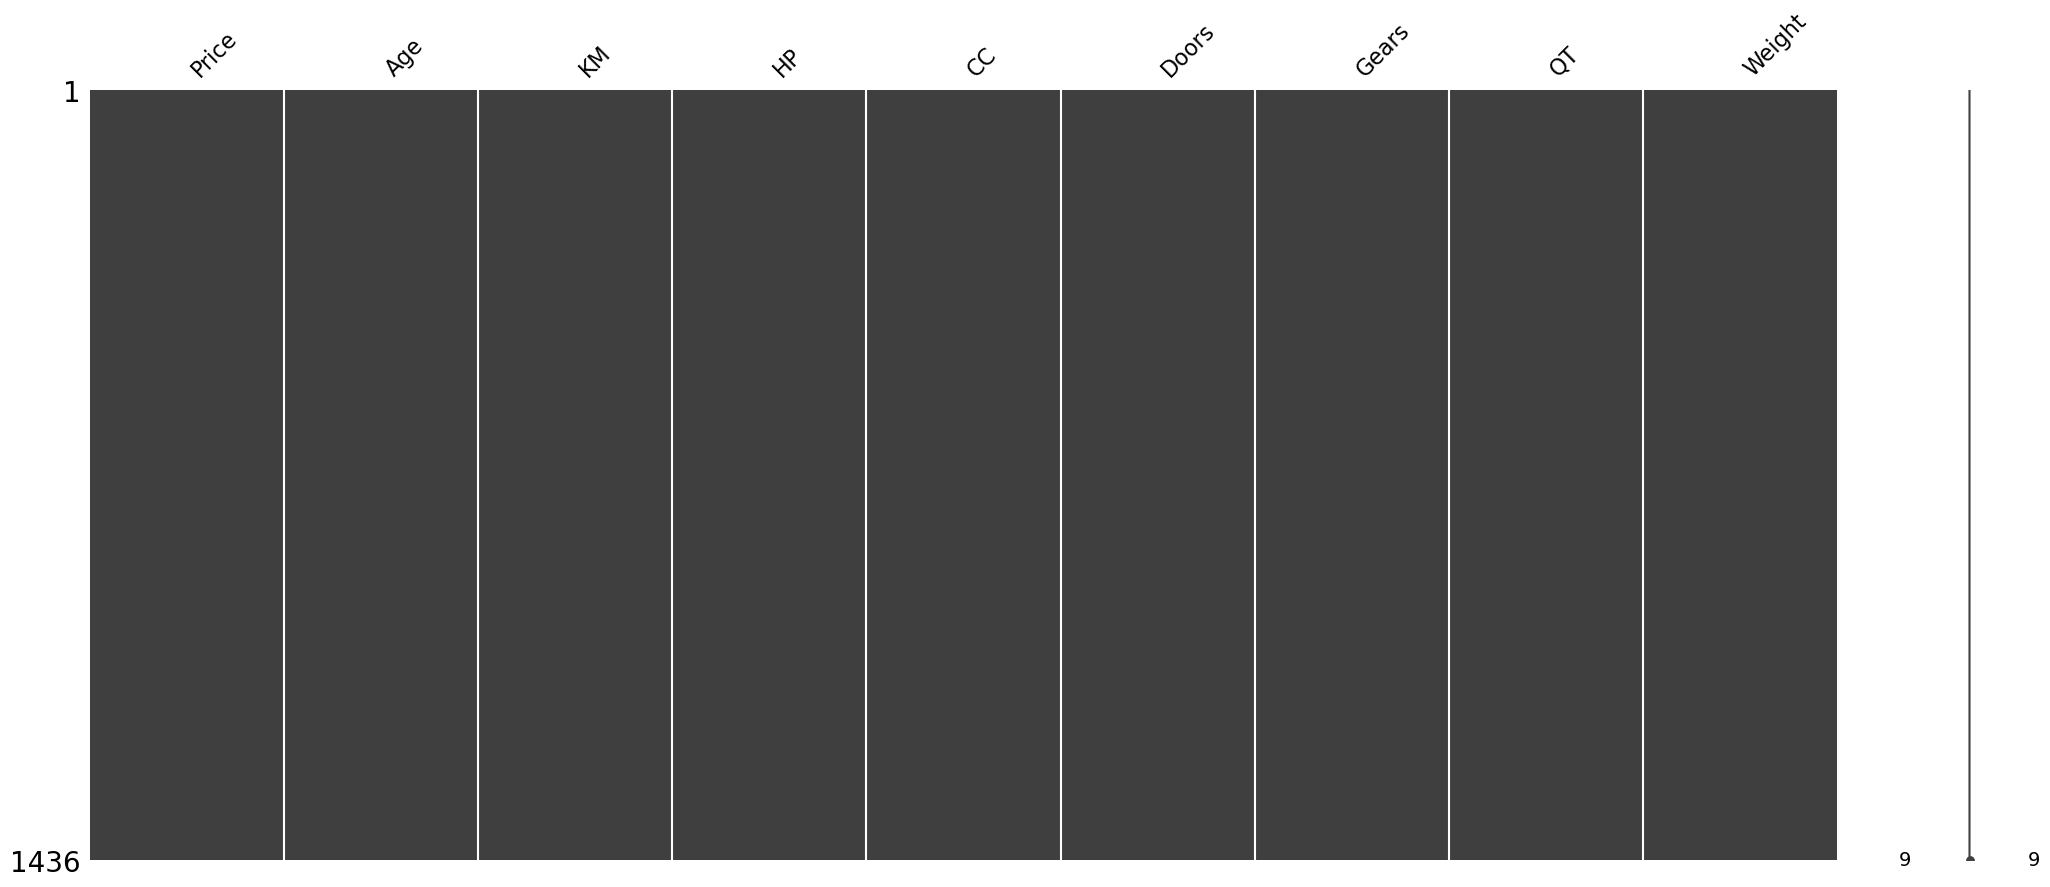

In [15]:
mn.matrix(data);

Observation: After checking above there is no null value present in the dataset

## Checking for Duplicated Values

In [16]:
data[data.duplicated()].shape

(1, 9)

In [17]:
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [18]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


## Observation: There are duplicated values in the dataset

Hence, we dropped those values

## Let's find how many discrete and continuous feature are their

In [19]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [20]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


## Exploratory Data Anlaysis

Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [21]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

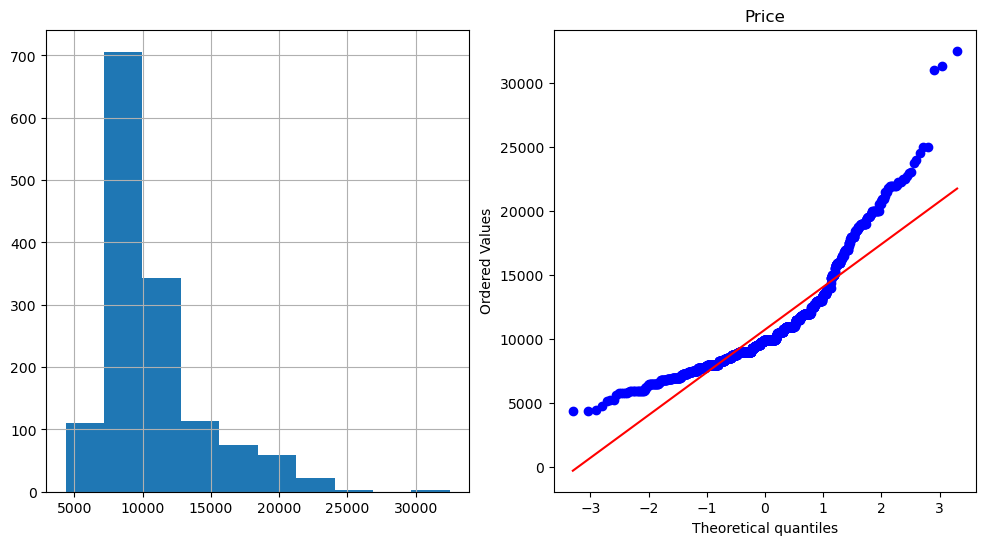

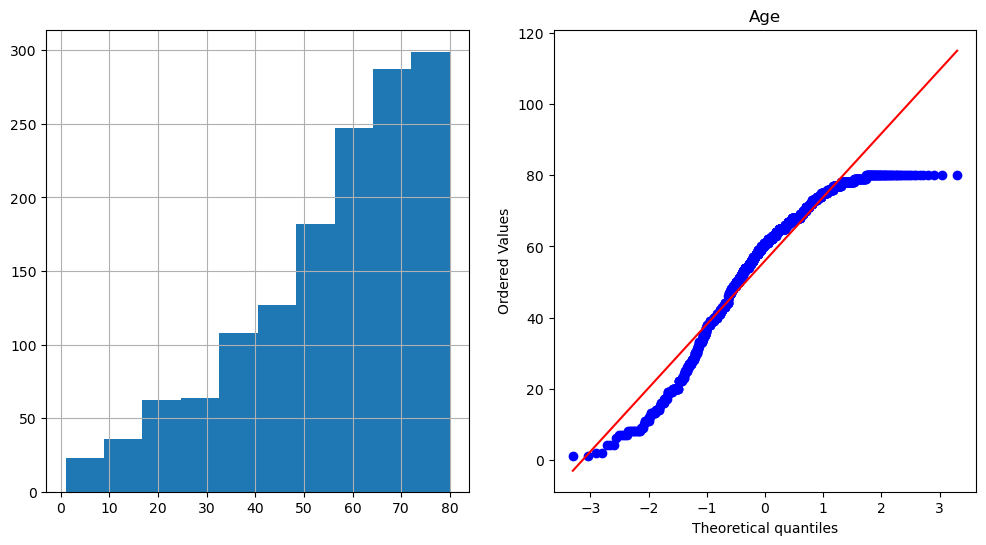

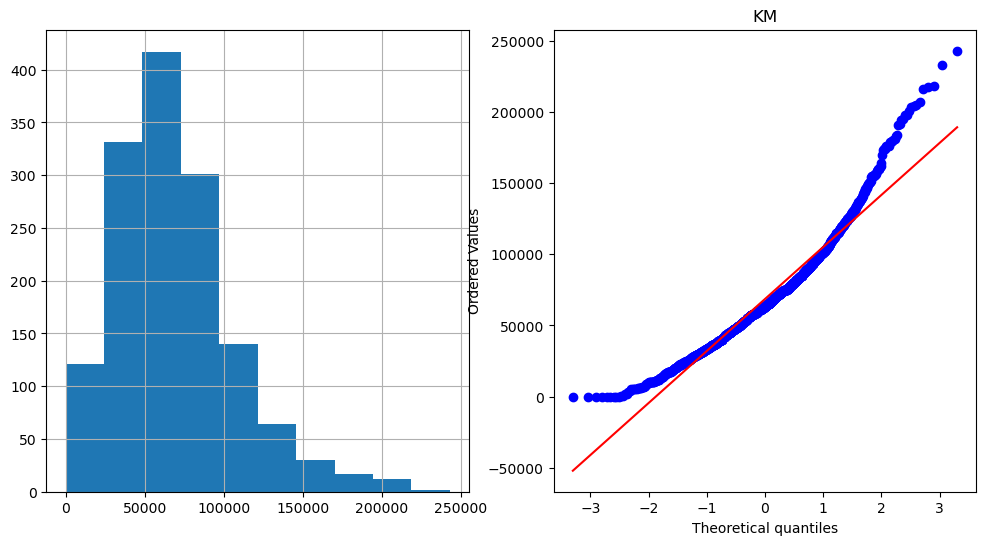

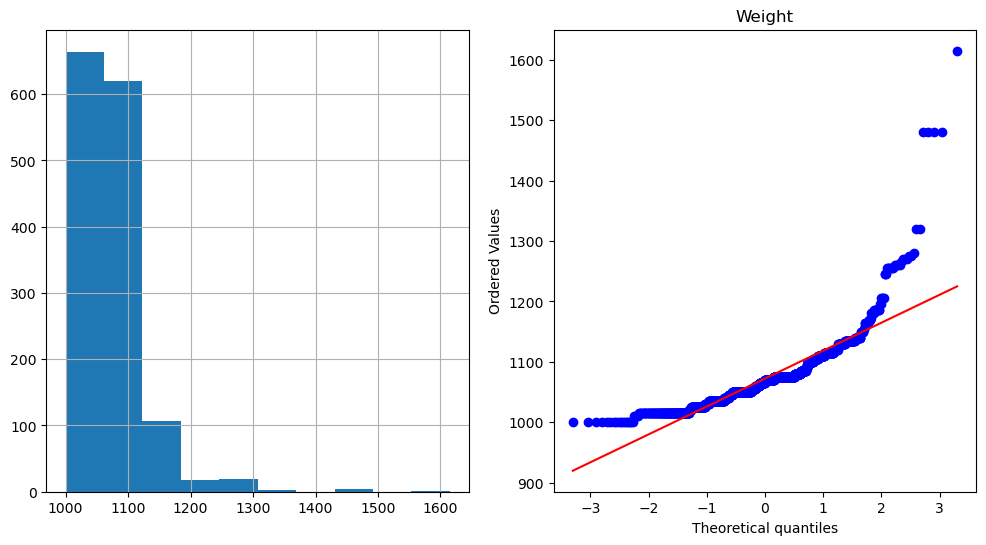

In [22]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

## Log transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

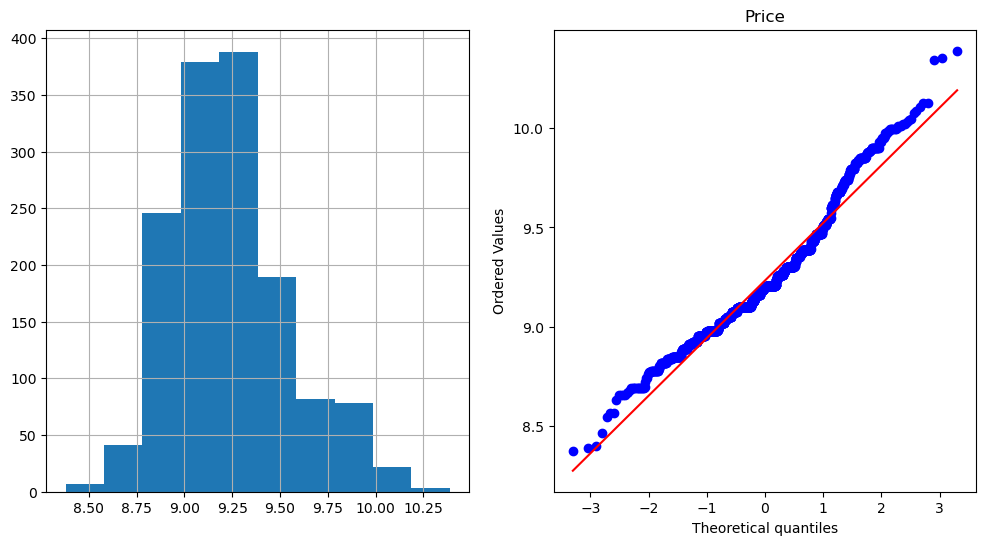

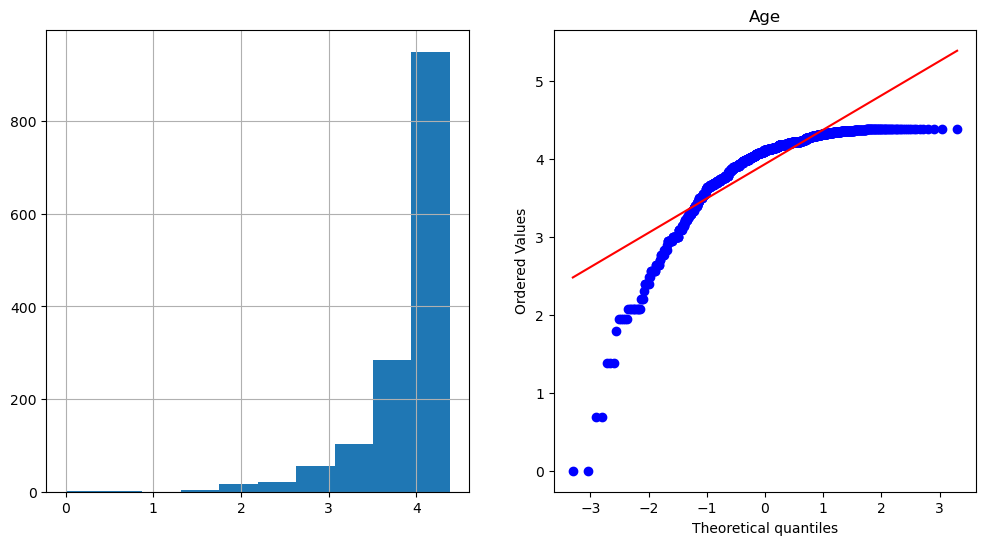

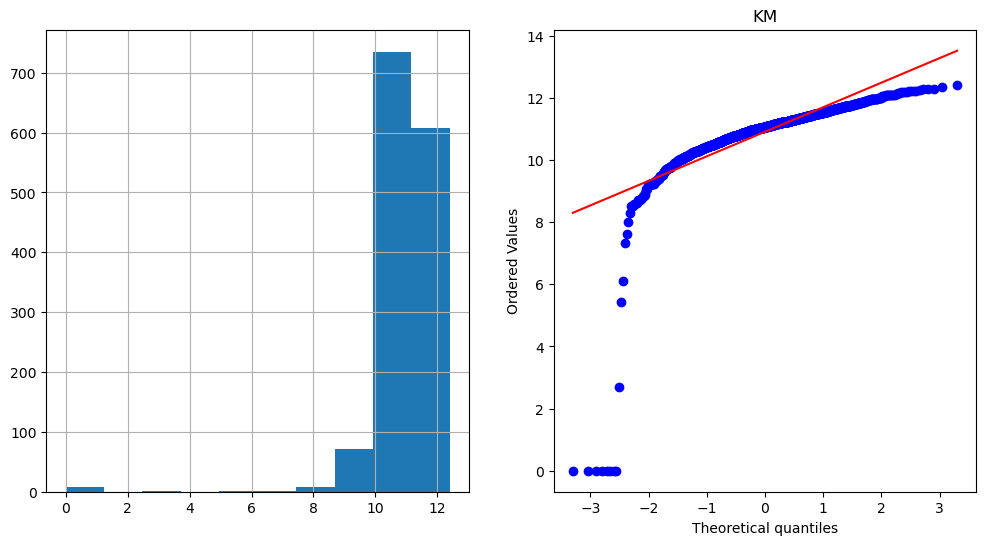

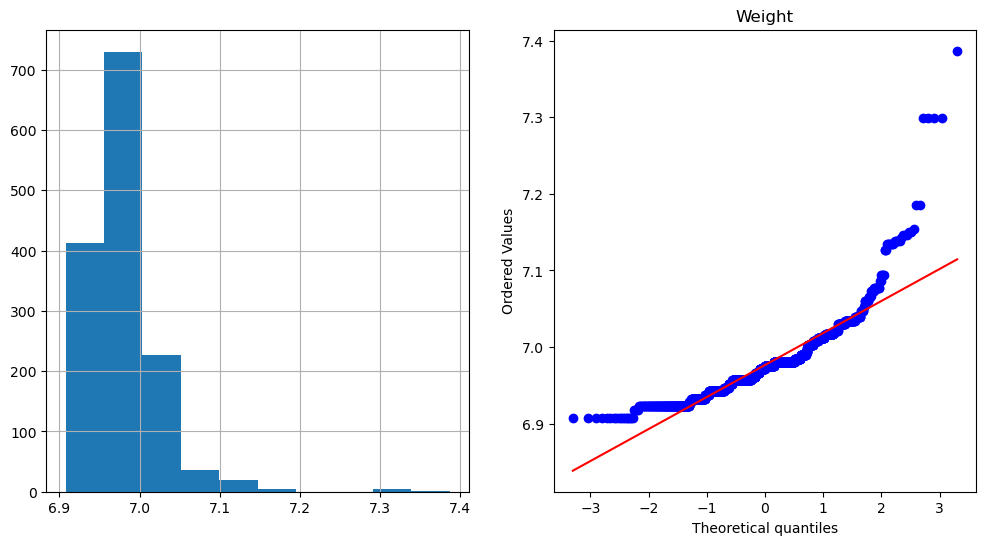

In [23]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

## Square root transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

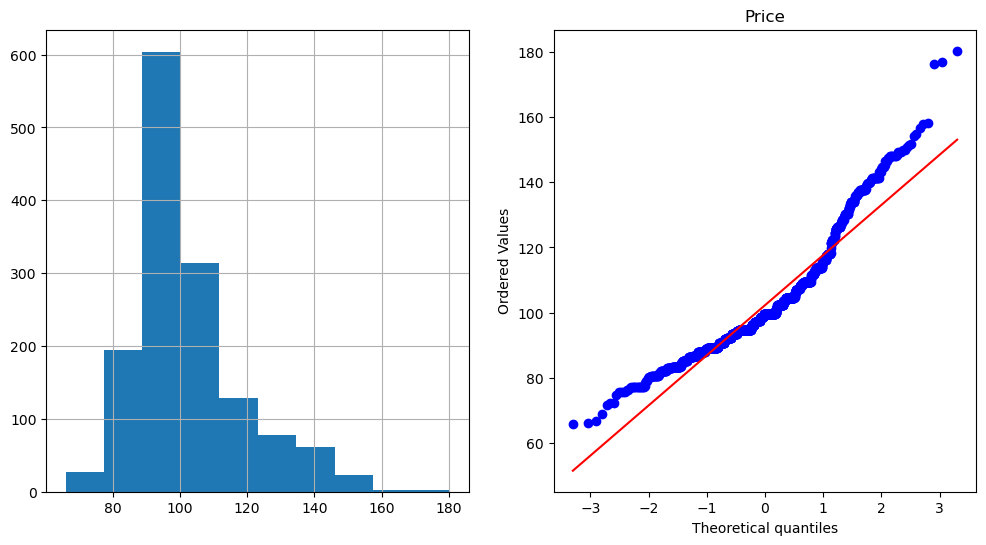

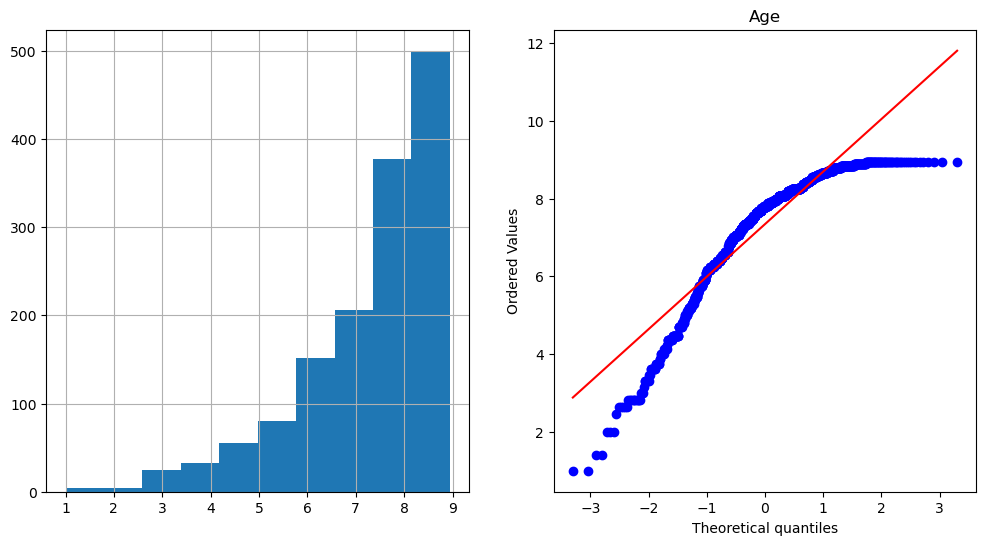

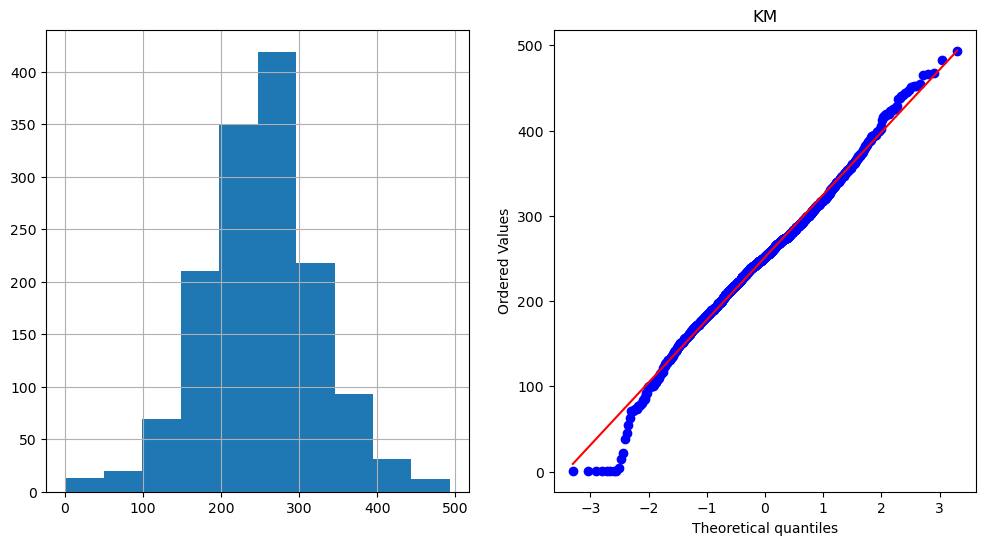

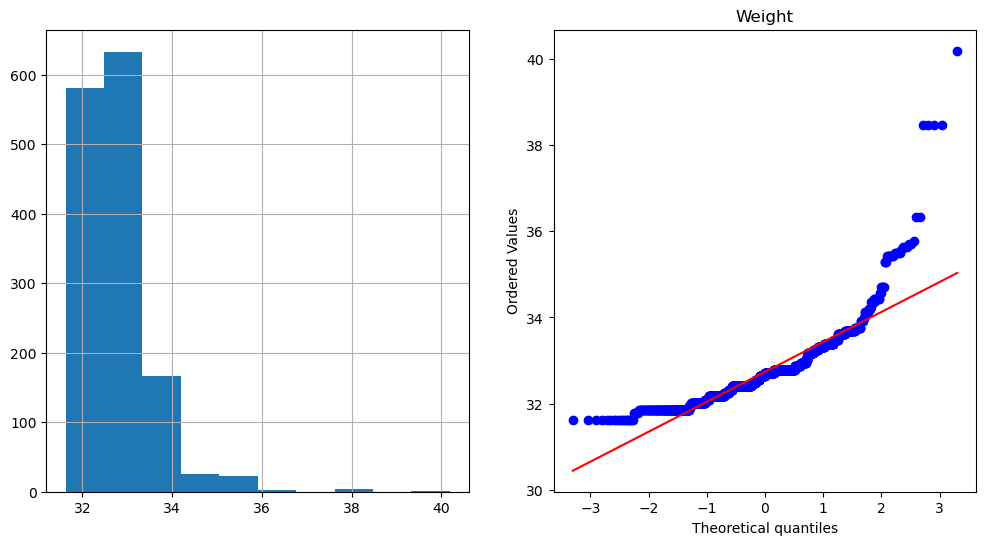

In [24]:
df=data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

## Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

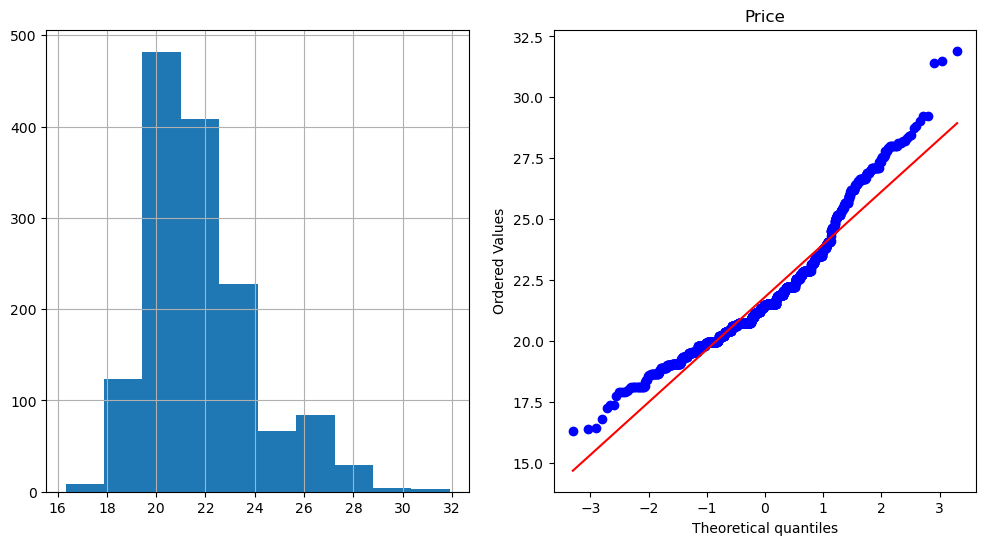

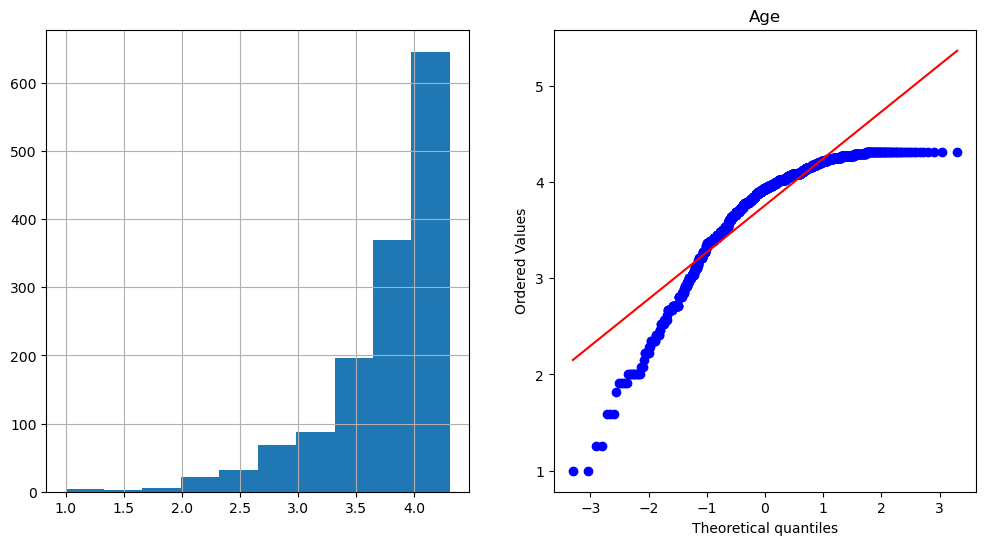

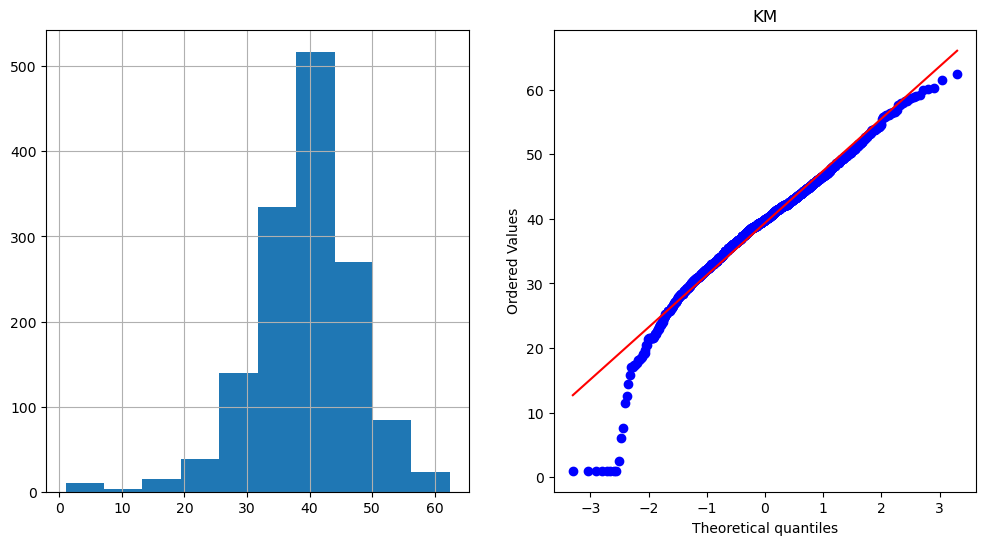

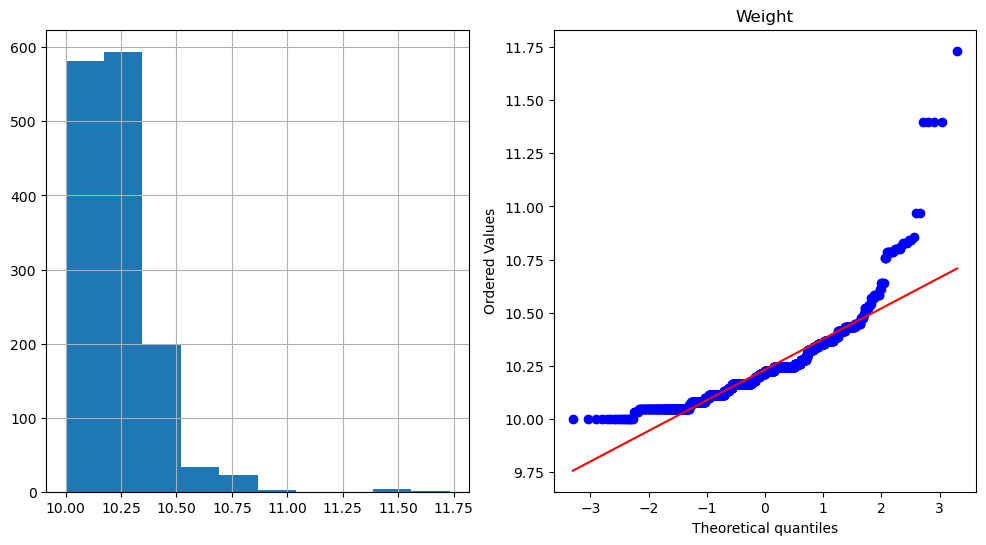

In [25]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

Note: Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.

## The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

In [26]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [27]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age feature',shapiro(data.Age),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))

Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


## Observation: Since the p-values are less than .05, we reject the null hypothesis.

We have sufficient evidence to say that the sample data does not come from a normal distribution.

## Visualizing the Relation between each independent Feature with respect to the Dependent Feature

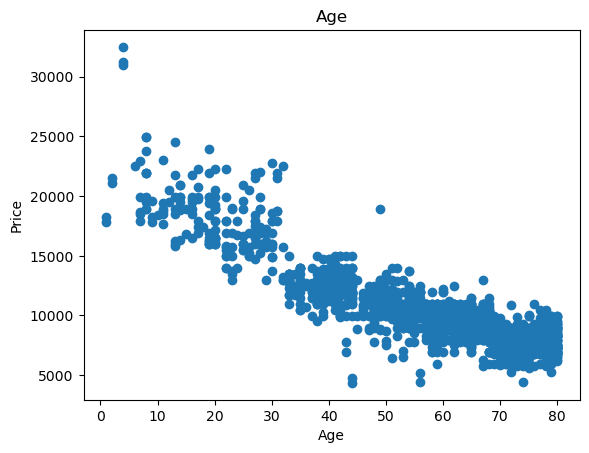

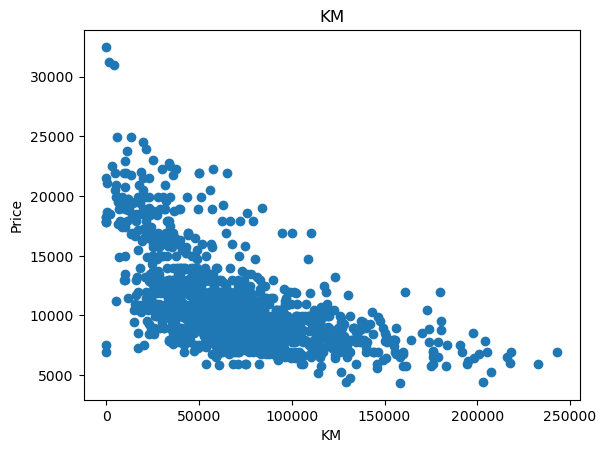

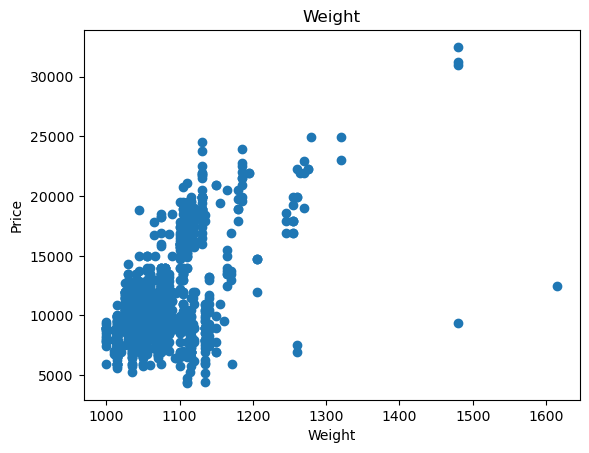

In [28]:
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features

## Lets analyze the relationship between the discrete variables and Price

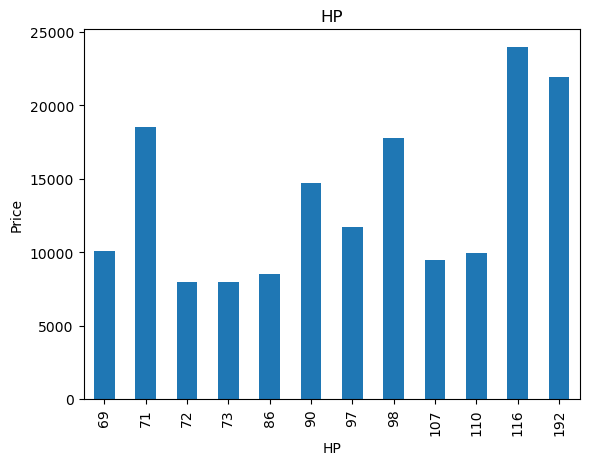

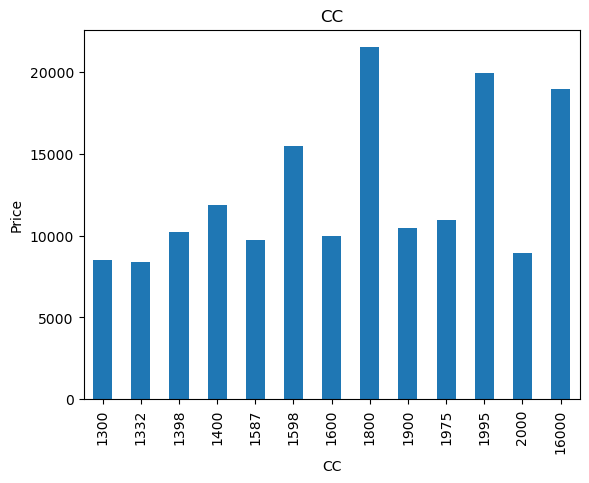

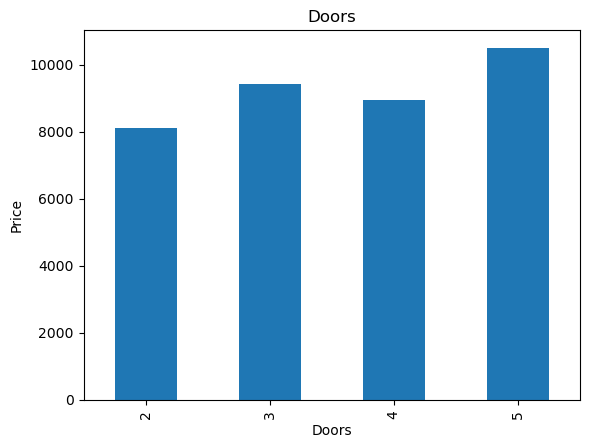

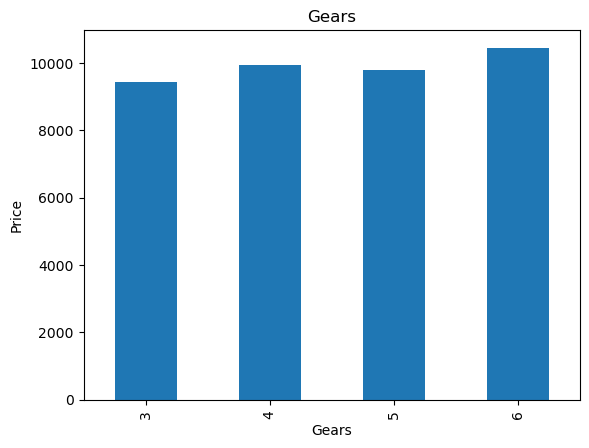

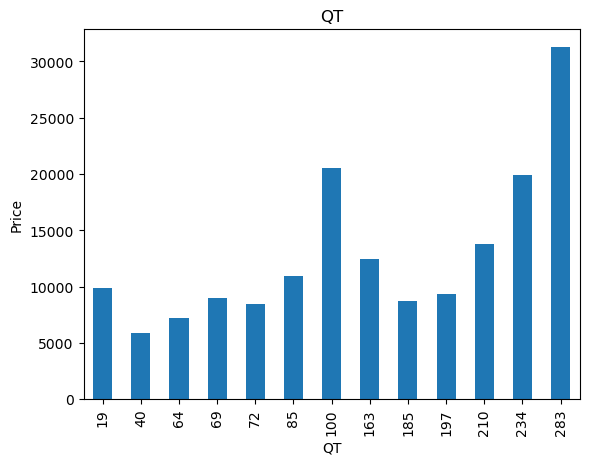

In [29]:
for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

## Observation:There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation

# Visualizing Continuous Datatype for Outlier Detection

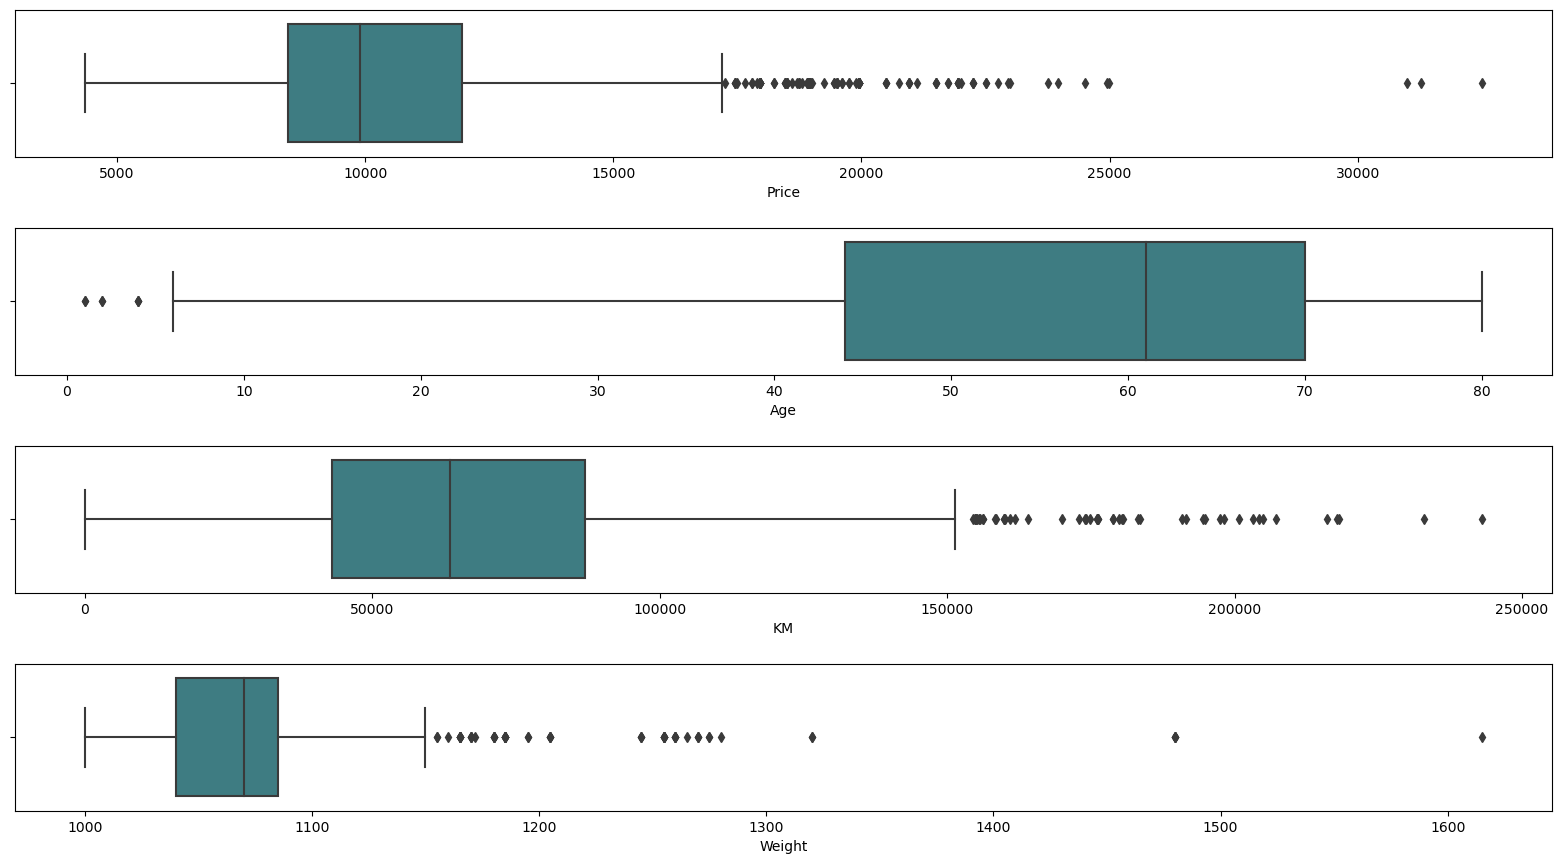

In [30]:
df=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

Observation: A significant amount of outliers are present in each continuous feature

Note:

We can't simply remove the outliers that would mean loss of information
We need to try different types of transformation or imputation and select the one with the best results
Note: Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values

## Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case

# Let's try Median Imputation to handle Outlier in Profit

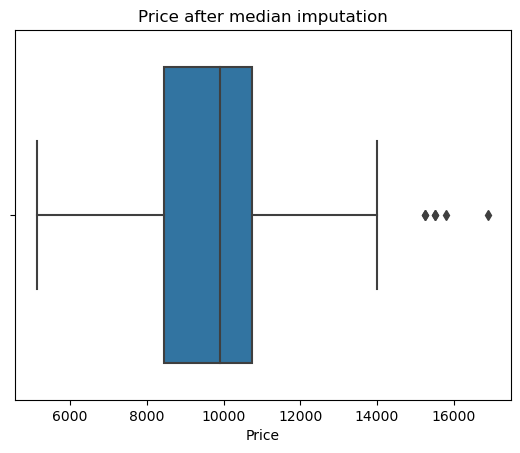

In [31]:
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

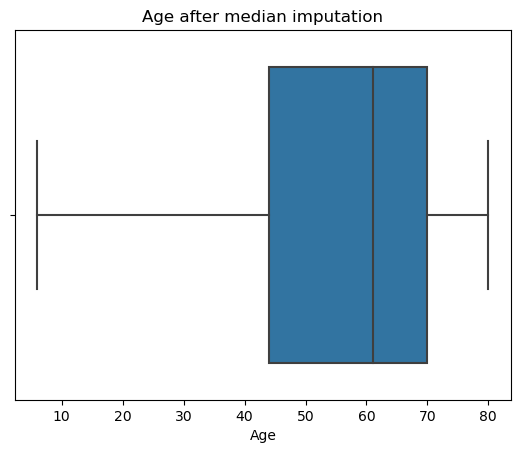

In [32]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

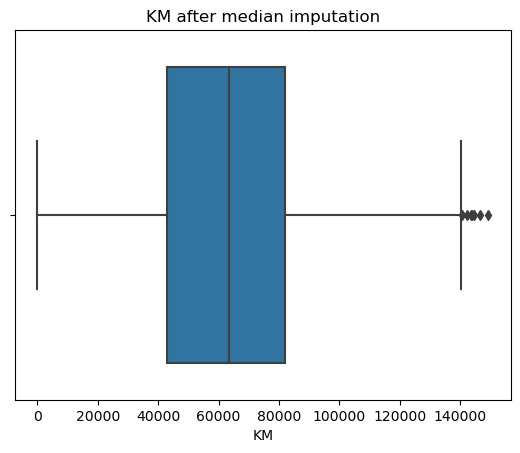

In [33]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

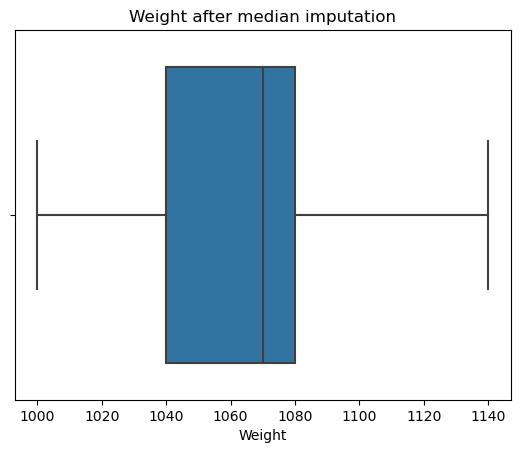

In [34]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

## Let's test our data in model and find the R-squared with median imputation data model

In [35]:
after_median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.34204996085646144, 0.3406706106695777)

## Let's try Mean Imputation to handle Outlier in Profit

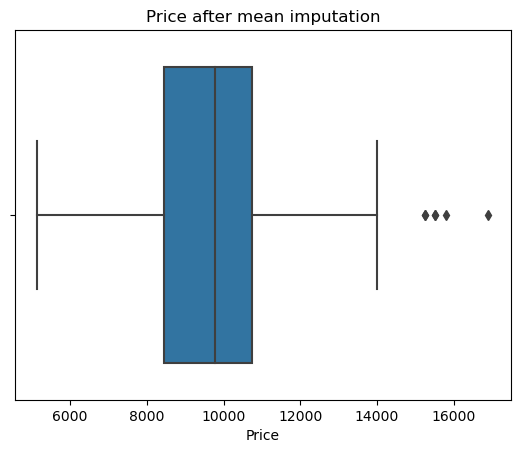

In [36]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

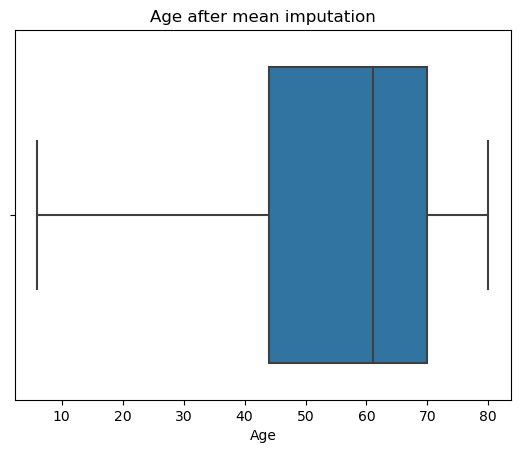

In [37]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

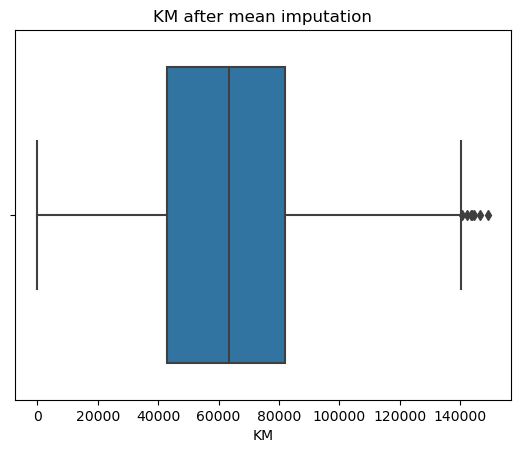

In [38]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

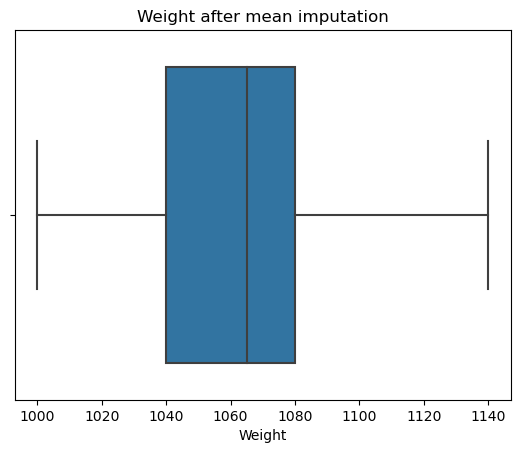

In [39]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

## Let's test our data in model and find the R-squared with mean imputation data model

In [40]:
after_mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.3879621958171299, 0.3866790976951533)

# ^Observation: As you can see after mean imputation the model is not performing well
    Now we have to try something else to get out better results than the raw data

# ^Observation: As you can see even after imputation the model is not performing well it getting worse

    Now we have to try something else to get out model better than the raw data

    The best thing we can do is now to remove the outlier and see the results

In [41]:
df3=data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

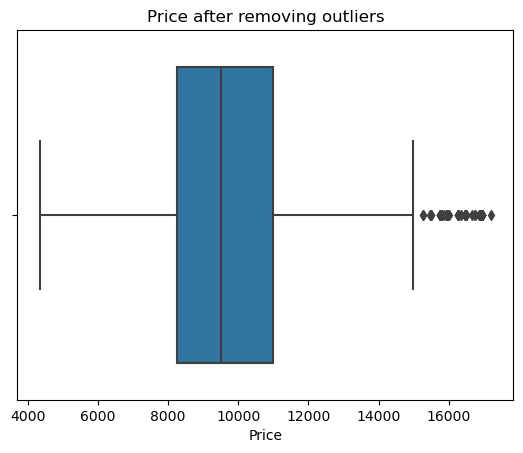

In [42]:
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers');

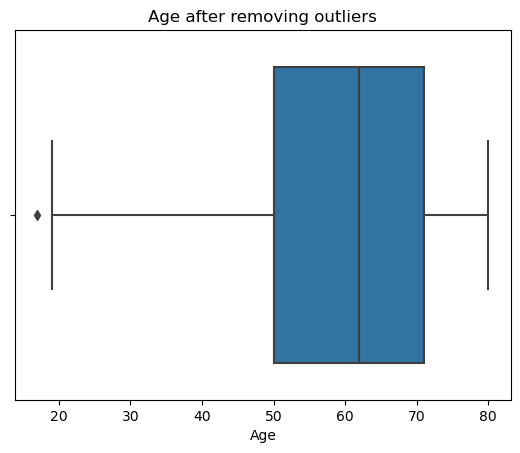

In [43]:
drop_outliers(df3, 'Age')
sns.boxplot(df3.Age)
plt.title('Age after removing outliers');

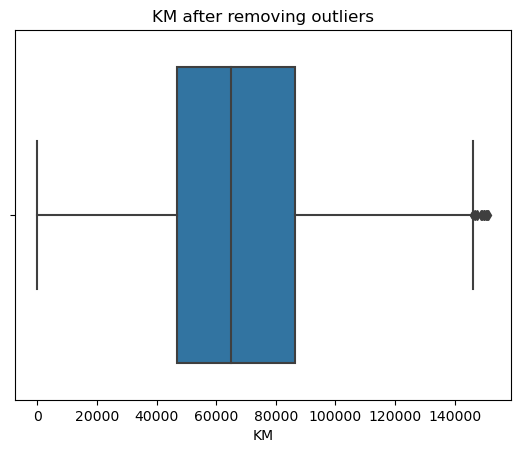

In [44]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers');

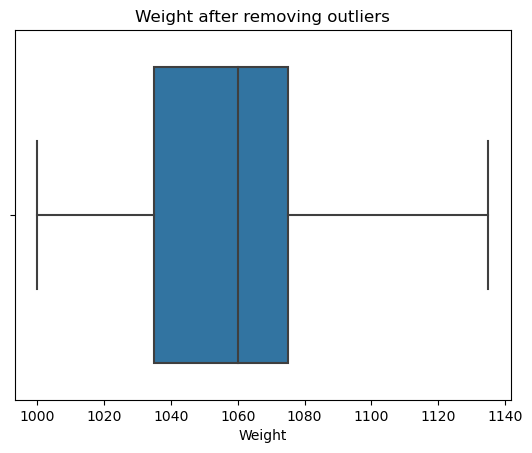

In [45]:
drop_outliers(df3, 'Weight')
sns.boxplot(df3.Weight)
plt.title('Weight after removing outliers');

## Let's test our data in model and compare the R-squared with without imputation data model

In [46]:
removed_outlier_model = smf.ols("Price~Age+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.7776886294411589, 0.7771455234870249)

In [47]:
np.sqrt(removed_outlier_model.mse_resid)

1060.0301342603996

## Let's try log transformation and visualize the result first

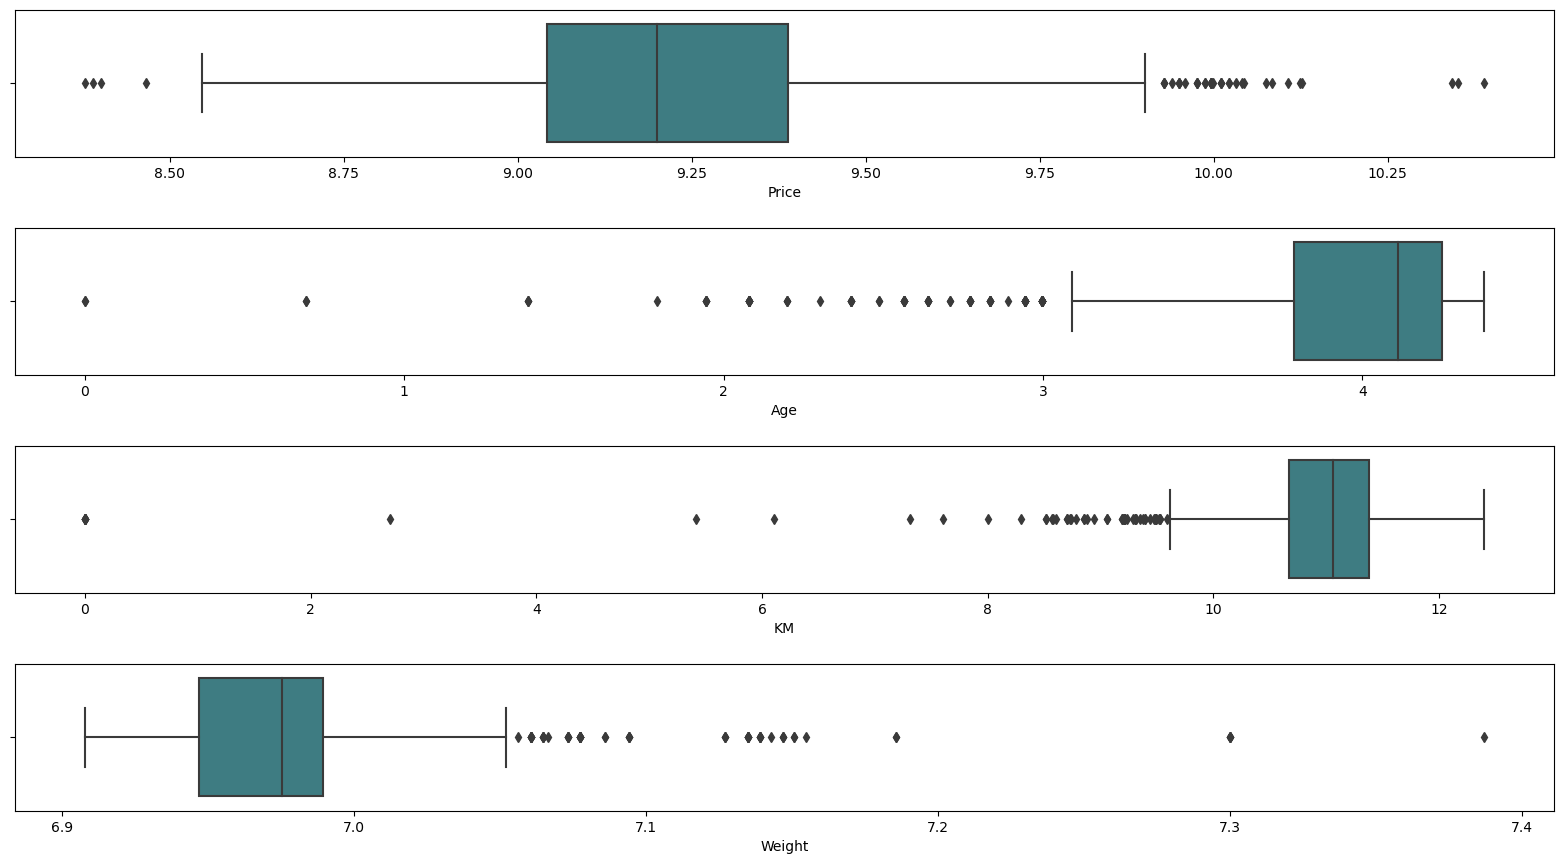

In [48]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])
    
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [49]:
log_transfomed = data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj

(0.7069873404282615, 0.7063730581230796)

## Observation: The outliers are still present

Let's try cuberoot transformation and visualize the result first

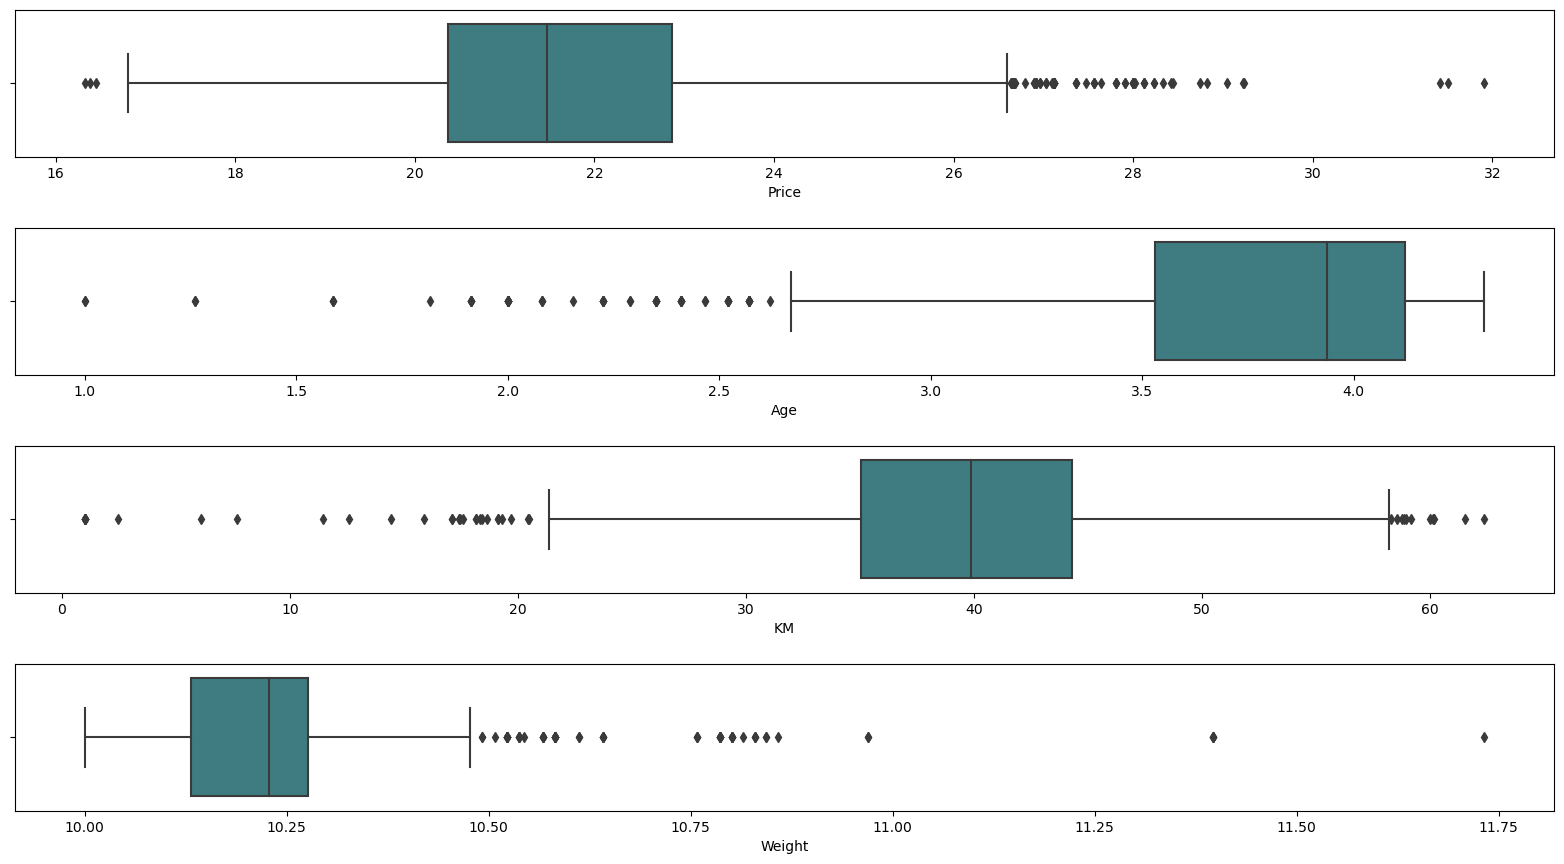

In [50]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [51]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price~Age+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj 

(0.8146046800585908, 0.8142160106247514)

## Observation: The outliers are still present
    
## Observation: After removing Outliers the model performed very poorly than the raw data model
     Note: We will continue with different technique to deal with that

# Raw Data Model

In [52]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [53]:
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = data).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:38   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
np.sqrt(raw_data_model.mse_resid)

1341.8046186938675

# Detecting Influencers/Outliers in the Model

Two Techniques : 1. Cook's Distance & 2. Leverage value

In [55]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

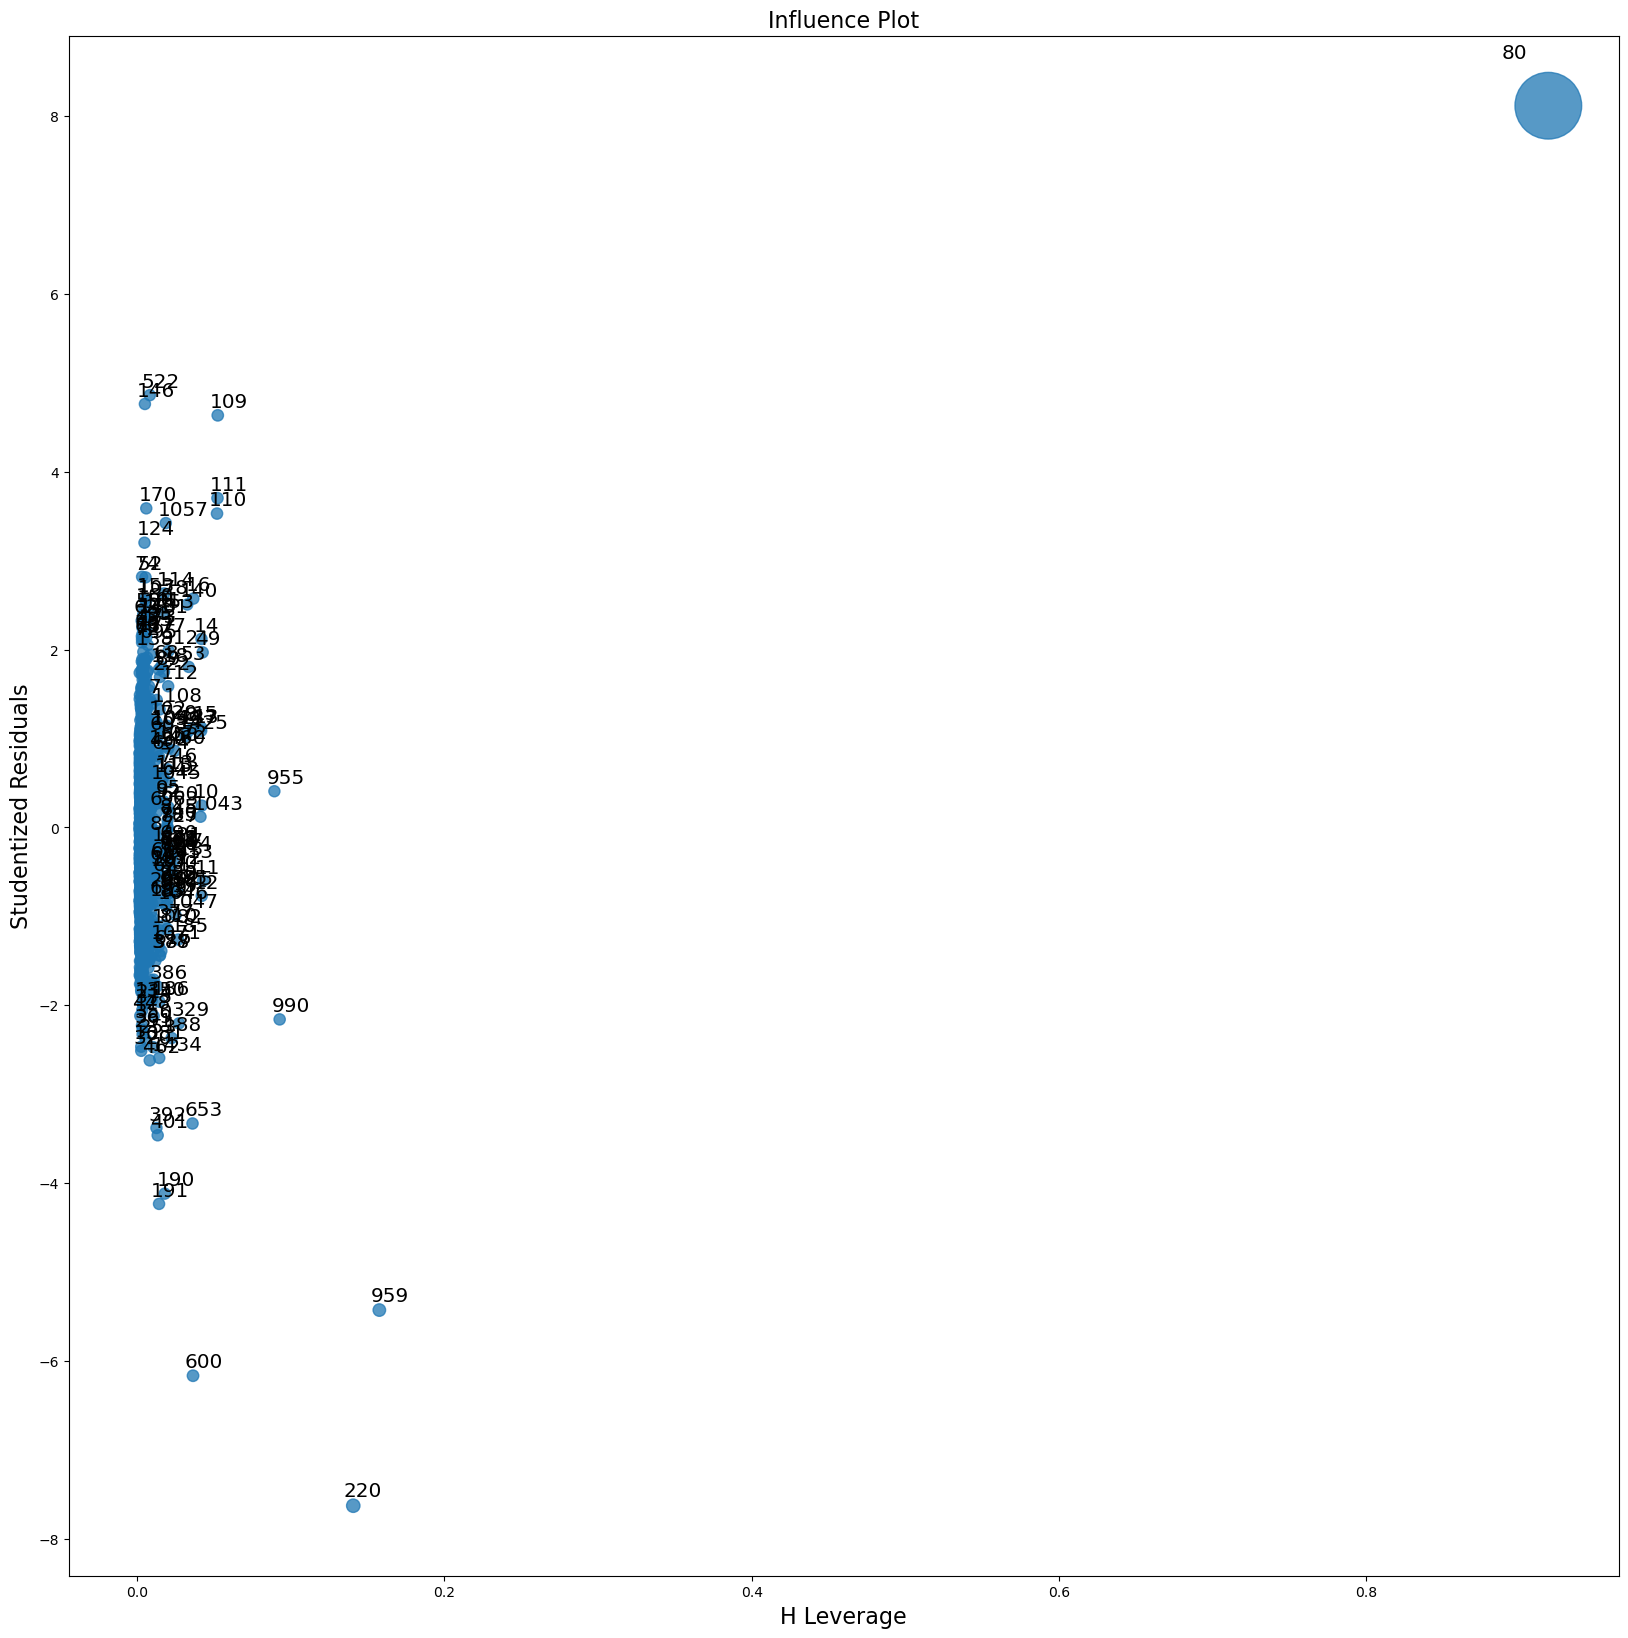

In [56]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

## Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [57]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


## Let's plot the influencers and also plot a cut off line using the stem plot

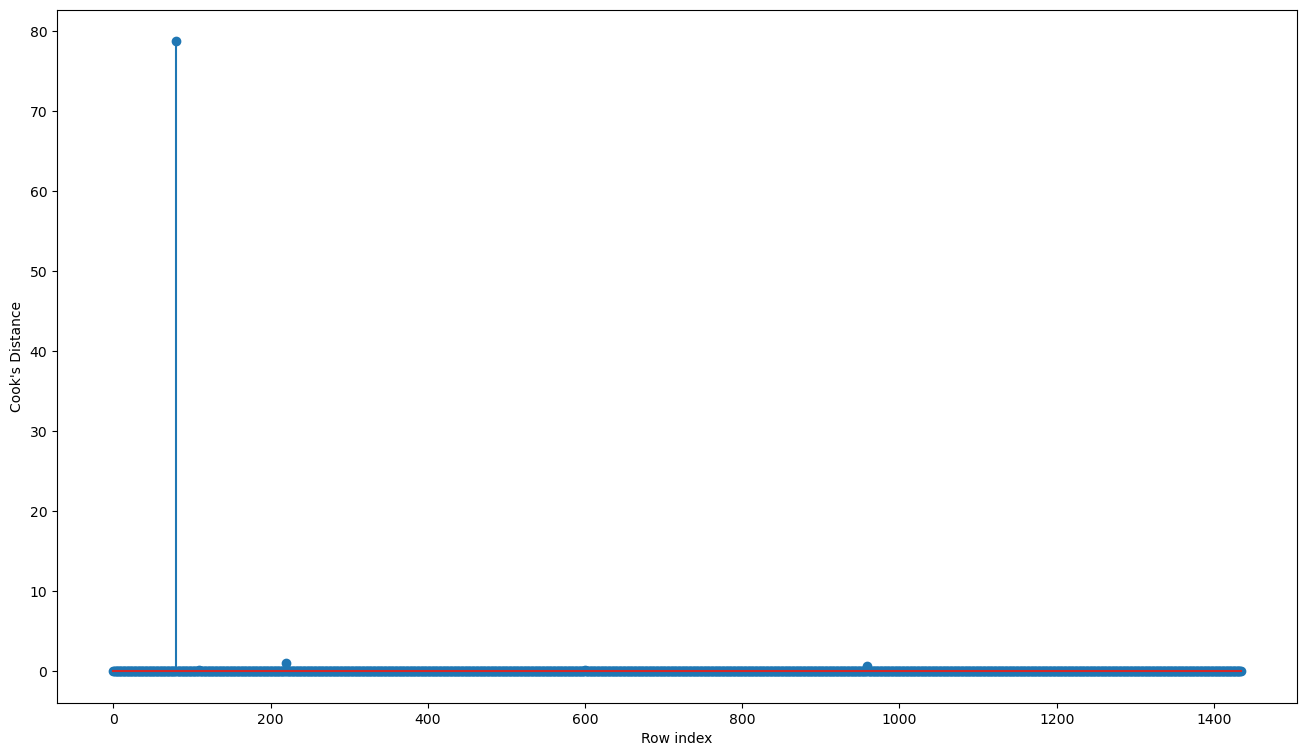

In [58]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [59]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224947)

In [60]:
data[data.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Let's improve the model by deleting the influence point and creating a new dataframe

In [61]:
dataframe= data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [62]:
data.shape

(1435, 9)

## Model Deletion Diagnostics and Final Model

In [63]:
# Another Method
"""k=dataframe.shape[1]
n=dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)"""

'k=dataframe.shape[1]\nn=dataframe.shape[0]\nleverage_cutoff = (3*(k+1))/n\nwhile np.max(c)>leverage_cutoff:\n    model=smf.ols(\'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight\',data=dataframe).fit()\n    (c,_)=model.get_influence().cooks_distance\n    c\n    np.argmax(c) , np.max(c)\n    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)\n    dataframe\nelse:\n    final_model=smf.ols(\'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight\',data=dataframe).fit()\n    final_model.rsquared , final_model.aic\n    print("Thus model accuracy is improved to",final_model.rsquared)'

In [64]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [65]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [66]:
dataframe.shape

(1330, 9)

In [67]:
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245


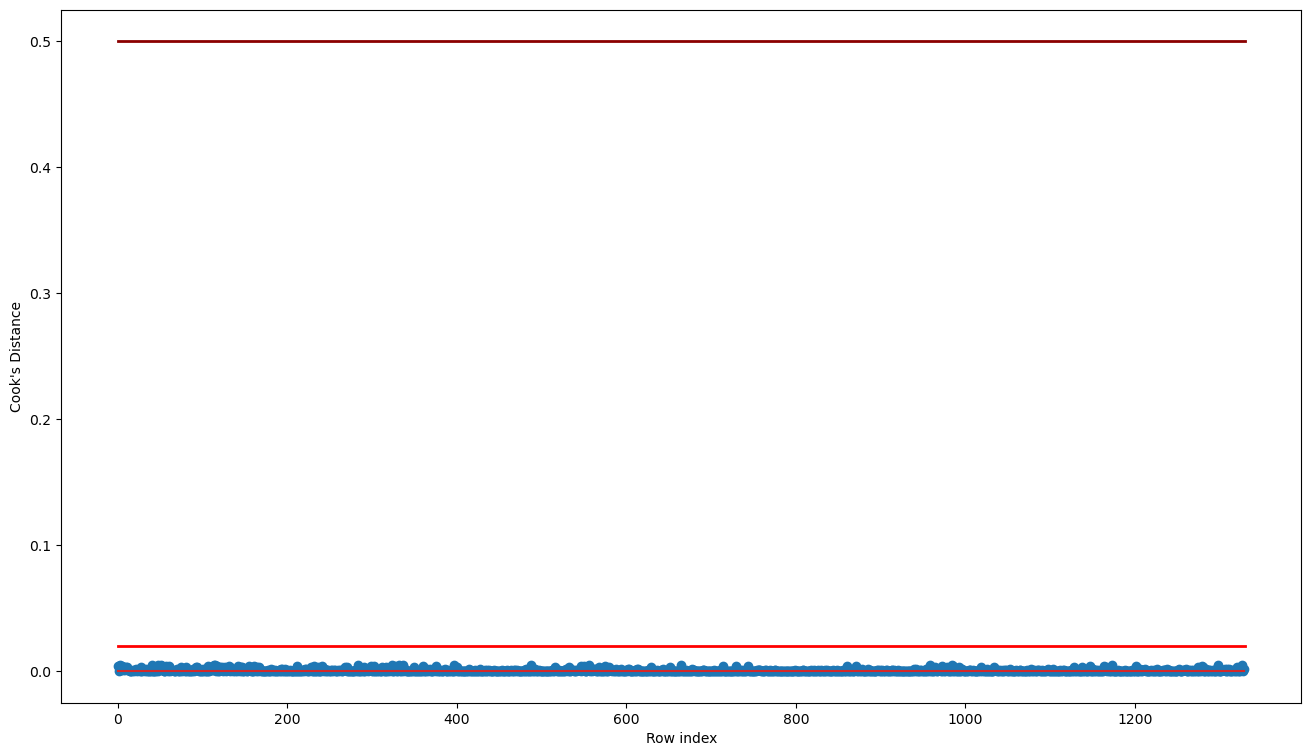

In [68]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

## Observation: All the points are below our cut-off line
Hence, we can say that there are no influncers present in our model we can proceed with the predictions

In [69]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:52   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP             7.8533      3.037      2.586      0.010       1.895      13.812
CC            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears        251.4363    163.559      1.537      0.124     -69.428     572.301
QT           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
np.sqrt(final_model.mse_resid)

975.9271399262799

# Feature Engineering

Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

## Log-Transformation

In [71]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

,Age,Price,KM,Weight,CC,Doors,HP
0,3.135494,9.528794,11.197351,7.060476,2000,3,90
1,3.258097,9.612467,10.778956,7.060476,2000,3,90
2,3.401197,9.528794,10.558414,7.064759,2000,3,90
3,3.465736,9.468851,11.018629,7.064759,2000,3,90
4,3.295837,9.735069,11.457540,7.126891,2000,3,90


In [72]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     729.6
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:53   Log-Likelihood:                 843.01
No. Observations:                1330   AIC:                            -1672.
Df Residuals:                    1323   BIC:                            -1636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3980      1.353     -3.991      0.000      -8.052      -2.745
Age           -0.4079      0.013    -30.586      0.000      -0.434      -0.382
KM             0.0034      0.006      0.594      0.552      -0.008       0.015
HP             0.0032      0.000     11.096      0.000       0.003       0.004
CC            -0.0003   3.33e-05     -8.494      0.000      -0.000      -0.000
Doors         -0.0039      0.004     -0.927      0.354      -0.012       0.004
Weight         2.3427      0.197     11.867      0.000       1.955       2.730
==============================================================================
Omnibus:                      284.802   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.768
Skew:                          -0.976   Prob(JB):                    4.31e-249
Kurtosis:                       7.103   Cond. No.                     6.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cube-Root Transformation

In [73]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']
df_cbrt_scaled['QT'] = dataframe['QT']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
1,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
2,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90
3,3.174802,23.483163,39.364972,10.537282,2000,210,3,5,90
4,3.000000,25.662299,45.566822,10.757791,2000,210,3,5,90


In [74]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     991.6
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:53   Log-Likelihood:                -1505.8
No. Observations:                1330   AIC:                             3030.
Df Residuals:                    1321   BIC:                             3076.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5991      3.723     -4.996      0.000     -25.902     -11.296
Age           -2.5835      0.069    -37.297      0.000      -2.719      -2.448
KM            -0.0450      0.004    -11.317      0.000      -0.053      -0.037
HP             0.0139      0.002      6.029      0.000       0.009       0.018
CC            -0.0013      0.000     -5.690      0.000      -0.002      -0.001
Doors         -0.0179      0.025     -0.707      0.480      -0.067       0.032
Gears          0.2967      0.126      2.350      0.019       0.049       0.544
QT            -0.0016      0.001     -1.232      0.218      -0.004       0.001
Weight         5.0086      0.375     13.353      0.000       4.273       5.744
==============================================================================
Omnibus:                       83.976   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.525
Skew:                          -0.447   Prob(JB):                     2.79e-34
Kurtosis:                       4.410   Cond. No.                     2.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Square-Root Transformation

In [75]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']
df_sqrt_scaled['QT'] = dataframe['QT']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
1,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
2,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90
3,5.656854,113.798067,246.981781,34.205263,2000,210,3,5,90
4,5.196152,130.000000,307.590637,35.284558,2000,210,3,5,90


In [76]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1229.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:53   Log-Likelihood:                -3993.0
No. Observations:                1330   AIC:                             8004.
Df Residuals:                    1321   BIC:                             8051.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7308     15.607     -6.454      0.000    -131.348     -70.114
Age           -6.7197      0.157    -42.795      0.000      -7.028      -6.412
KM            -0.0384      0.003    -13.802      0.000      -0.044      -0.033
HP             0.0766      0.015      5.084      0.000       0.047       0.106
CC            -0.0082      0.001     -5.622      0.000      -0.011      -0.005
Doors         -0.2049      0.164     -1.251      0.211      -0.526       0.116
Gears          2.0321      0.819      2.481      0.013       0.425       3.639
QT            -0.0209      0.008     -2.563      0.010      -0.037      -0.005
Weight         7.9388      0.500     15.875      0.000       6.958       8.920
==============================================================================
Omnibus:                        7.852   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.528
Skew:                          -0.128   Prob(JB):                       0.0141
Kurtosis:                       3.297   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's try Robust transformation
The Robust Scaler, as the name suggests is not sensitive to outliers.

This scaler removes the median from the data
Scales the data by the InterQuartile Range(IQR)
The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

In [77]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.175000,-1.583333,0.211503,90,2000,3,5,210,2.222222
1,1.538636,-1.458333,-0.375961,90,2000,3,5,210,2.222222
2,1.175000,-1.291667,-0.599762,90,2000,3,5,210,2.333333
3,0.932576,-1.208333,-0.069708,90,2000,3,5,210,2.333333
4,2.129545,-1.416667,0.722122,90,2000,3,5,210,4.000000


In [78]:
robust_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:53   Log-Likelihood:                -262.35
No. Observations:                1330   AIC:                             542.7
Df Residuals:                    1321   BIC:                             589.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9936      0.285      3.487      0.001       0.435       1.553
Age           -0.7873      0.016    -49.648      0.000      -0.818      -0.756
KM            -0.1989      0.013    -14.830      0.000      -0.225      -0.173
HP             0.0024      0.001      2.586      0.010       0.001       0.004
CC            -0.0007   8.83e-05     -7.799      0.000      -0.001      -0.001
Doors         -0.0452      0.010     -4.600      0.000      -0.064      -0.026
Gears          0.0762      0.050      1.537      0.124      -0.021       0.173
QT            -0.0035      0.000     -7.144      0.000      -0.004      -0.003
Weight         0.5042      0.020     25.566      0.000       0.466       0.543
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Applying Standard Scaler

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [79]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [80]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:53   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.398e-16      0.009  -2.76e-14      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multi Linear Resgression  
## Preparing a Model

In [81]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:53   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.398e-16      0.009  -2.76e-14      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary
The values we are concerned with are -

The coefficients and significance (p-values) R-squared F statistic and its significance

R - squared is 0.896 Meaning that 89.9% of the variance in cnt with registered
This is a decent R-squared value.

3.F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

Note: If any of the above step is not followed our model can't be a good predictor

eval_env: 1


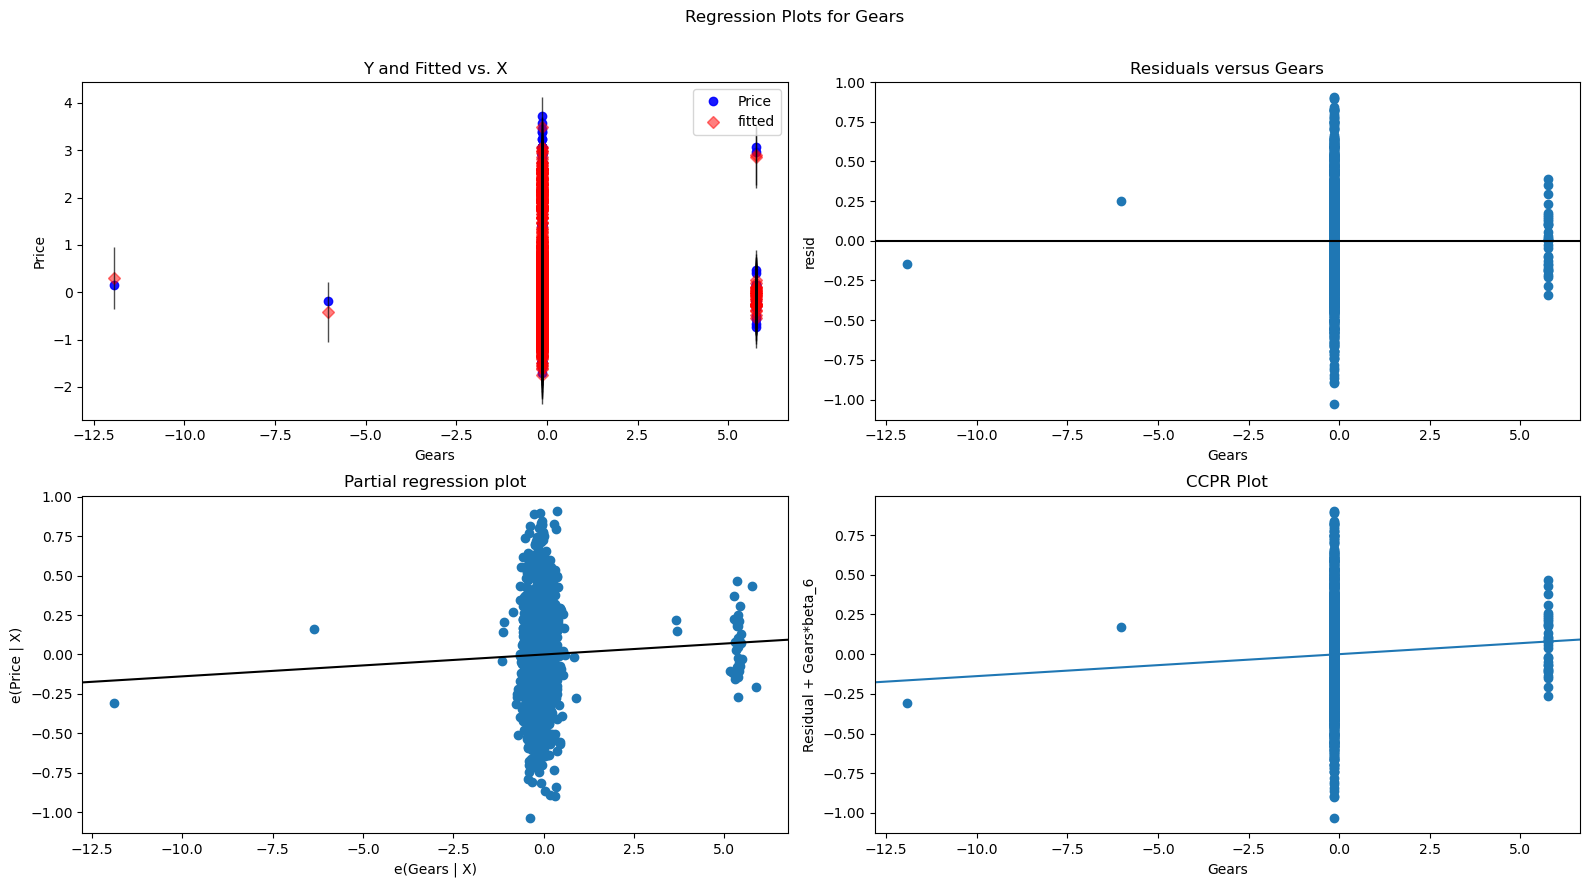

In [82]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

## Model Testing

Finding Coefficient Parameters (Beta0 and Beta1's values)
Assupmtion for multi linear Regression fails

Feature should be independent of each other there should'nt be any dependency upon each other

Here, (Intercept) Beta0 p_value ~ 1
Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

## Observation: If the p-value is not less than .05 for Gears features, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data providing those features dependency towards the dependent variable

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

# Let's Try another Test by Calculating VIF ( Variance Inflation Factor )

This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,QT,4.86
7,Weight,4.74
3,CC,3.73
0,Age,2.09
2,HP,2.09
1,KM,1.86
4,Doors,1.34
5,Gears,1.08


In [84]:
r_sqr_age = smf.ols('Age~HP+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC~HP+Weight+Age+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Age+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = smf.ols('QT~HP+Weight+CC+Doors+Age+Gears+KM', dataframe).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = smf.ols('KM~HP+Weight+CC+Doors+QT+Gears+Age', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~HP+Weight+CC+Doors+QT+Age+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~HP+Weight+CC+Age+QT+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [85]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','QT','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

,VIF
Variables,
Gears,1.075124
Doors,1.336868
KM,1.858592
Age,2.091177
HP,2.094861
CC,3.725960
Weight,4.744228
QT,4.863714


Note: We generally want a VIF that is less than 5. As you can see QT has the highest value among others lets investigate

In [86]:
#Simple Linear Model using QT
qt_model = smf.ols('Price~QT', data=df_standard_scaled).fit()
qt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     24.53
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           8.27e-07
Time:                        21:42:55   Log-Likelihood:                -1875.0
No. Observations:                1330   AIC:                             3754.
Df Residuals:                    1328   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.398e-16      0.027  -8.82e-15      1.000      -0.053       0.053
QT             0.1347      0.027      4.952      0.000       0.081       0.188
==============================================================================
Omnibus:                      268.046   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.056
Skew:                           1.259   Prob(JB):                    5.15e-103
Kurtosis:                       4.469   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
gears_model = smf.ols('Price~Gears', data=df_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08310
Date:                Thu, 12 Jan 2023   Prob (F-statistic):              0.773
Time:                        21:42:55   Log-Likelihood:                -1887.1
No. Observations:                1330   AIC:                             3778.
Df Residuals:                    1328   BIC:                             3789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.398e-16      0.027  -8.74e-15      1.000      -0.054       0.054
Gears          0.0079      0.027      0.288      0.773      -0.046       0.062
==============================================================================
Omnibus:                      289.163   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.772
Skew:                           1.333   Prob(JB):                    4.10e-115
Kurtosis:                       4.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
gears_qt_weight_model = smf.ols('Price~Gears+QT', data=df_standard_scaled).fit()
gears_qt_weight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.30
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           5.08e-06
Time:                        21:42:55   Log-Likelihood:                -1875.0
No. Observations:                1330   AIC:                             3756.
Df Residuals:                    1327   BIC:                             3772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.398e-16      0.027  -8.82e-15      1.000      -0.053       0.053
Gears          0.0085      0.027      0.313      0.754      -0.045       0.062
QT             0.1347      0.027      4.952      0.000       0.081       0.188
==============================================================================
Omnibus:                      268.324   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.601
Skew:                           1.260   Prob(JB):                    3.92e-103
Kurtosis:                       4.468   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model1 

Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Gears 

as it has a very high P Value of 0.75 in SLR and 0.12 in MLR has R square score of 0. Let's go ahead and drop this variable

In [89]:
# Dropping highly correlated variables and insignificant variables

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)

In [90]:
x.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [91]:
model_1 = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1703.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:42:56   Log-Likelihood:                -354.65
No. Observations:                1330   AIC:                             725.3
Df Residuals:                    1322   BIC:                             766.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.398e-16      0.009  -2.76e-14      1.000      -0.017       0.017
Age           -0.6233      0.013    -49.609      0.000      -0.648      -0.599
KM            -0.1743      0.012    -14.750      0.000      -0.197      -0.151
HP             0.0360      0.012      2.915      0.004       0.012       0.060
CC            -0.1329      0.017     -7.955      0.000      -0.166      -0.100
Doors         -0.0493      0.010     -5.016      0.000      -0.069      -0.030
QT            -0.1350      0.019     -7.057      0.000      -0.172      -0.097
Weight         0.4850      0.019     25.656      0.000       0.448       0.522
==============================================================================
Omnibus:                        4.861   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.872
Skew:                           0.148   Prob(JB):                       0.0875
Kurtosis:                       2.984   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# ^Observation: As our Multicollinearity problem has been solved
## Feature Selection Techniques in Machine Learning

## Correlation Coefficient

In [93]:
data.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


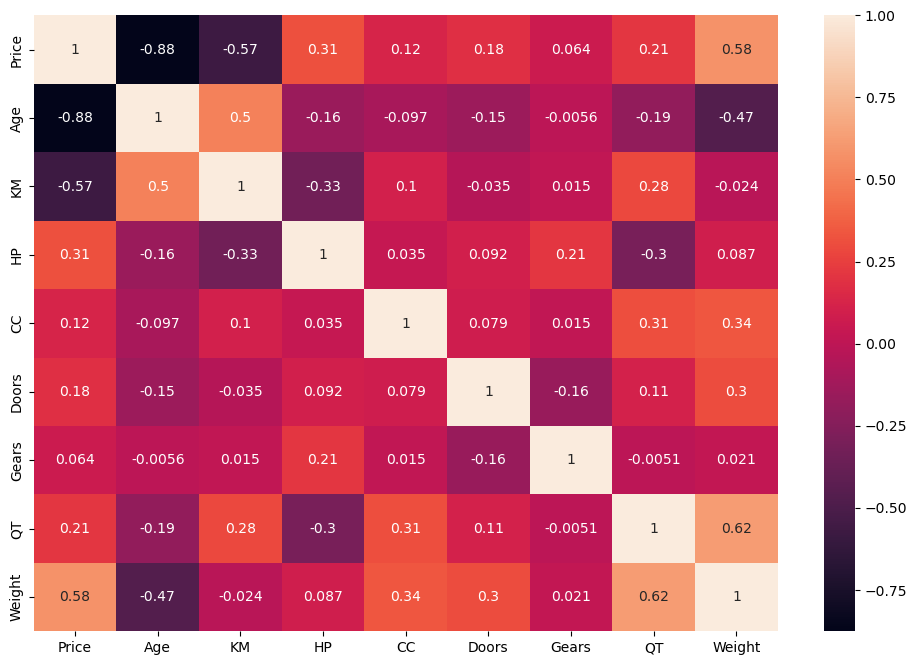

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(
    data.corr(),
    annot=True);

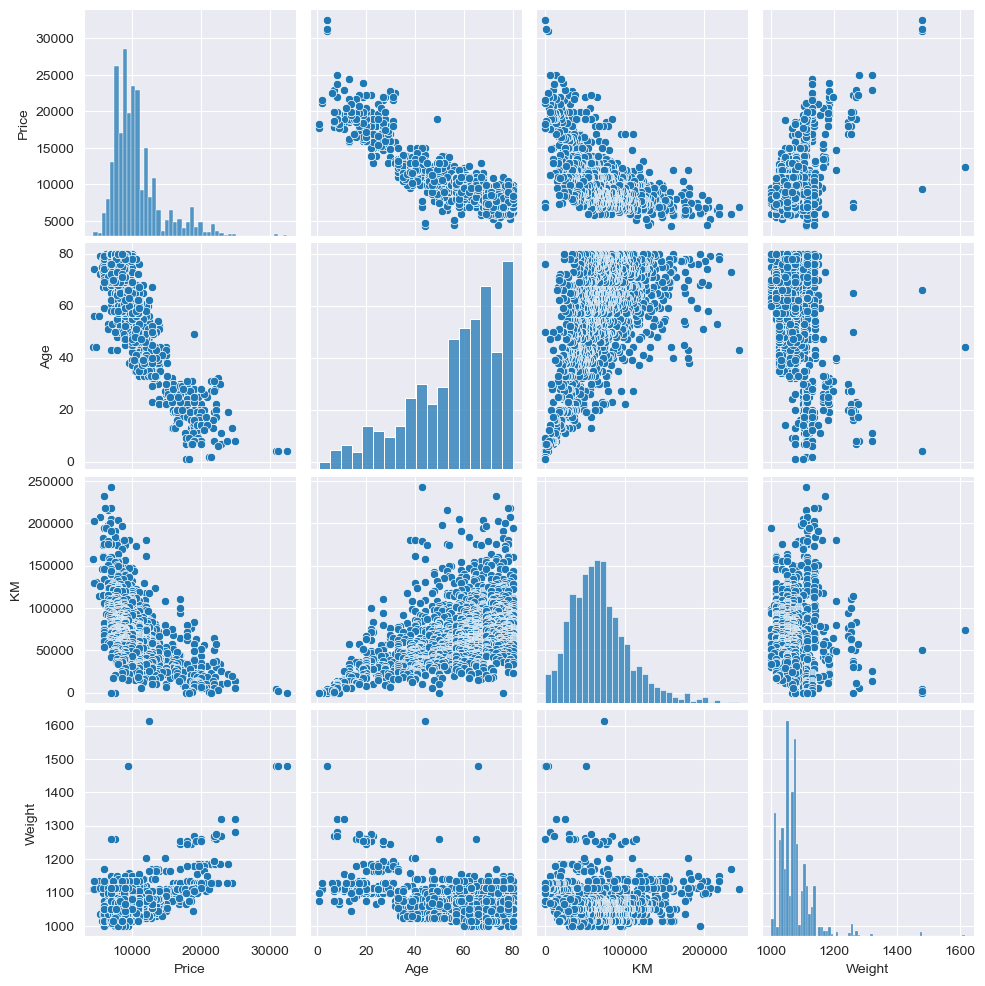

In [95]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature]);

Let's seperate the x and y values

In [96]:
df_standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [97]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]

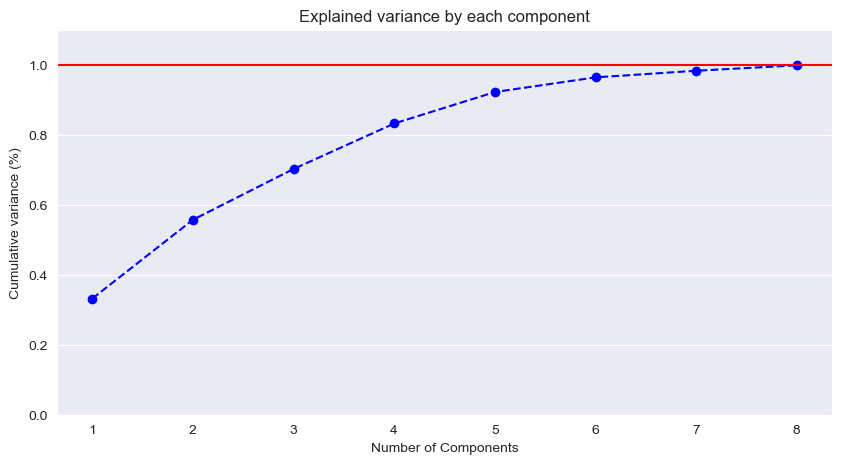

In [98]:
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [99]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.33354904, 0.22519775, 0.1451224 , 0.12991156, 0.08985917,
       0.04191581, 0.01895074, 0.01549353])

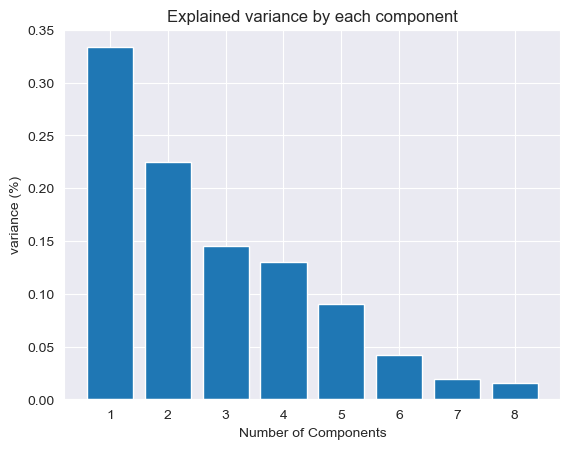

In [100]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component');

In [101]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 33.35,  55.87,  70.38,  83.37,  92.36,  96.55,  98.45, 100.  ])

## As you can see just by 5 feature we get a variance of more than 90%

In [102]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(1330, 8)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162


In [103]:
dataframe.Price

0       13750
1       14950
2       13750
3       12950
4       16900
        ...  
1325     8450
1326     7500
1327    10845
1328     8500
1329     7250
Name: Price, Length: 1330, dtype: int64

In [104]:
pca_std_df['Price'] = y
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560,-1.915503
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104,-1.746462
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730,-1.521074
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472,-1.408380
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162,-1.690115


In [105]:
import statsmodels.formula.api as sm
pca_model= sm.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.360e+33
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:43:05   Log-Likelihood:                 45451.
No. Observations:                1330   AIC:                        -9.088e+04
Df Residuals:                    1321   BIC:                        -9.084e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.221e-16   9.59e-18     12.733      0.000    1.03e-16    1.41e-16
PC1           -0.1952   5.87e-18  -3.33e+16      0.000      -0.195      -0.195
PC2           -0.5630   7.14e-18  -7.88e+16      0.000      -0.563      -0.563
PC3           -0.0925    8.9e-18  -1.04e+16      0.000      -0.092      -0.092
PC4            0.4131   9.41e-18   4.39e+16      0.000       0.413       0.413
PC5            0.0314   1.13e-17   2.78e+15      0.000       0.031       0.031
PC6           -0.6137   1.66e-17  -3.71e+16      0.000      -0.614      -0.614
PC7            0.2681   2.46e-17   1.09e+16      0.000       0.268       0.268
PC8            0.1273   2.72e-17   4.67e+15      0.000       0.127       0.127
==============================================================================
Omnibus:                     1279.434   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247605.523
Skew:                          -3.922   Prob(JB):                         0.00
Kurtosis:                      69.382   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  1.0
R2_Adjusted_score :  1.0
RMSE :  6012.984866656378


In [107]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560,13750
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104,14950
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730,13750
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472,12950
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162,16900


In [108]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((931, 8), (399, 8), (931,), (399,))

In [109]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1)) 
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

LinearRegression()

In [110]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9010967686242178
R2_score (train):  0.9058327433544345
R2_score (test):  0.8859113536008999
RMSE using all features:  1044.486068620271


# Forward Selection
## Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [111]:
X = dataframe.drop('Price', axis =1)
Y = dataframe[['Price']]

In [112]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [113]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((931, 8), (399, 8), (931, 1), (399, 1))

In [119]:
# step forward feature selection
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(x_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.9s finished

[2023-01-12 21:47:55] Features: 1/4 -- score: 0.8588922974516446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.0s finished

[2023-01-12 21:48:01] Features: 2/4 -- score: 0.8845545875227816[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.4s finished

[2023-01-12 21:48:08] Features: 3/4 -- score: 0.9054211042008941[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [118]:
pip install mlxtend


     ---------------------------------------- 1.3/1.3 MB 1.9 MB/s eta 0:00:00


In [122]:
sfs1.k_feature_idx_

(0, 1, 3, 7)

In [123]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['Age', 'KM', 'CC', 'Weight'], dtype='object')

## Observation: For the above case we can say these 4 features are enough to get a higher R-squared value

In [124]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'Price ~ Age + KM + HP + CC + Doors + Weight + QT + Gears'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

         coef         err varname
0 -108.257335    4.277641     Age
1   -0.015465    0.002046      KM
2    7.853334    5.958445      HP
3   -2.273119    0.571776      CC
4 -149.187276   63.623867   Doors
5   36.976781    2.837352  Weight
6  -11.618726    3.190591      QT
7  251.436316  320.864248   Gears


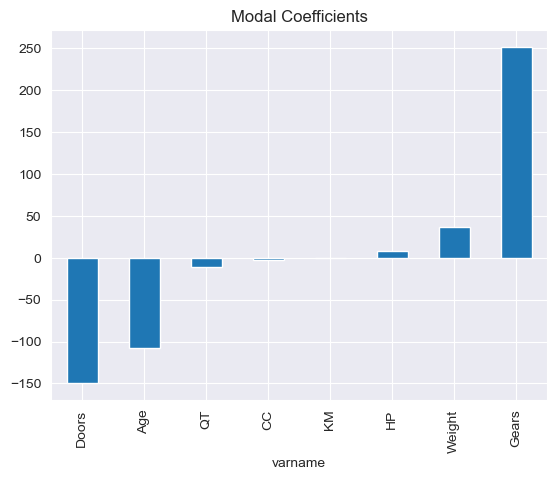

In [125]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients');

# Ridge Regression
Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.

In [126]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, normalize=True)

Note that value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.

# Alpha = 0.05

In [127]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8990715604329077
R2_score (train):  0.9036517538087957
R2_score (test):  0.8828983675352516
RMSE:  1058.1881959787934


In [128]:
ridgeReg.coef_.flatten()

array([-1.06751832e+02, -1.77878403e-02,  8.51378690e+00, -1.62288173e+00,
       -6.35551858e+01,  1.93236473e+02, -7.21634741e+00,  2.99844117e+01])

In [129]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

         coef varname
0 -106.751832     Age
1   -0.017788      KM
2    8.513787      HP
3   -1.622882      CC
4  -63.555186   Doors
5  193.236473   Gears
6   -7.216347      QT
7   29.984412  Weight


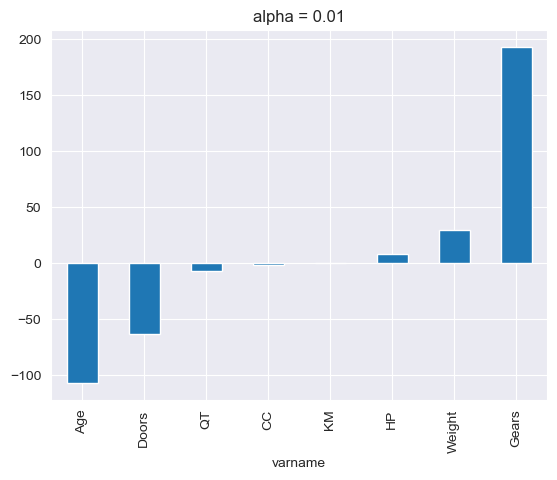

In [130]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.01');

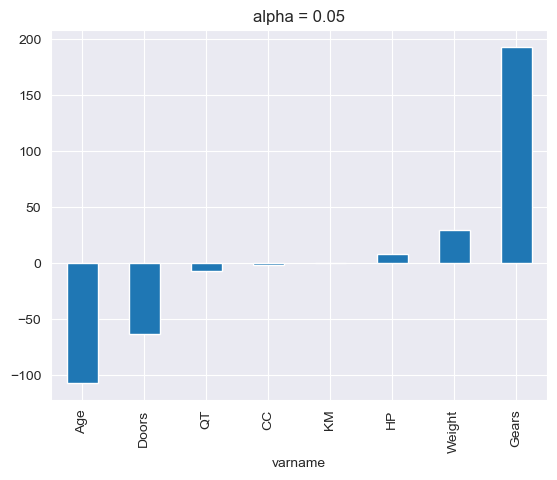

In [131]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05');

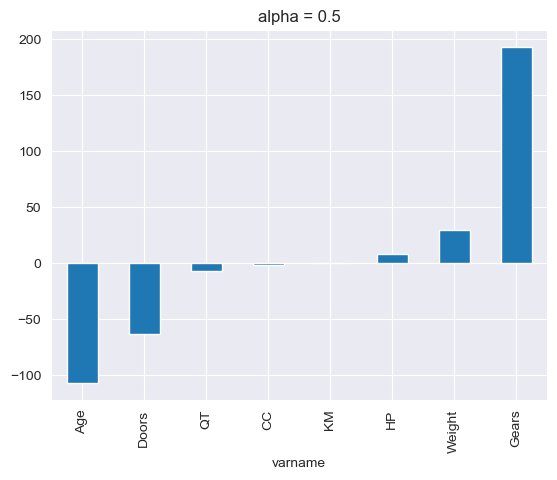

In [132]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5');

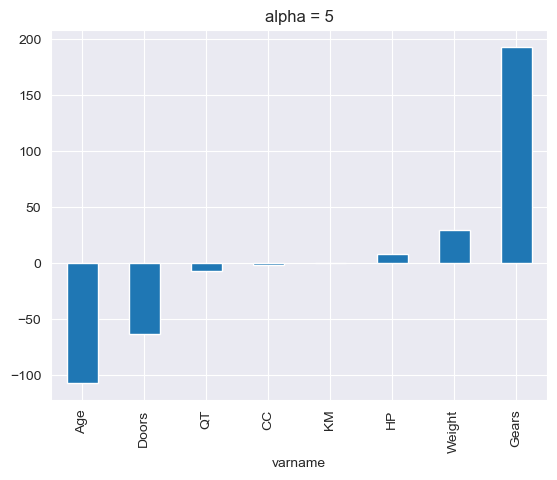

In [133]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5');

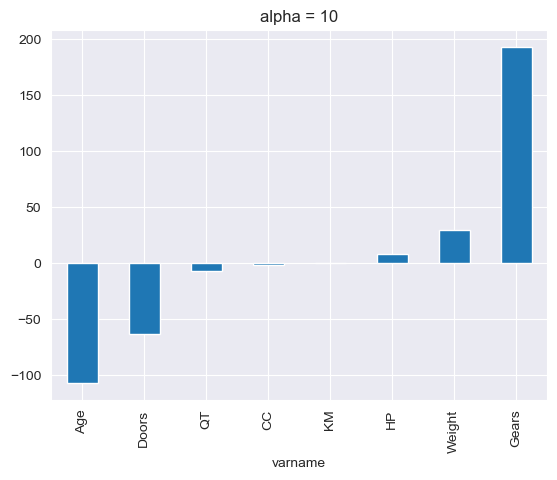

In [134]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 10');

In [135]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [136]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8866230882384682
R2_score (train):  0.9209526910958892
R2_score (test):  0.8987821125529648
RMSE:  983.8073715686186


In [137]:
from sklearn.feature_selection import SelectFromModel
sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)

sel_ridge.get_support()

# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_ridge.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(x_train.columns[(sel_ridge.get_support())])

total features: 8
selected features: 3
Index(['Age', 'Doors', 'Gears'], dtype='object')


# LASSO Regression

In [138]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

In [139]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.9006401986073614
R2_score (train):  0.9054058676328888
R2_score (test):  0.8840091470723663
RMSE:  1053.1574613699324


In [140]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

         coef varname
0 -111.687292     Age
1   -0.016277      KM
2    5.090988      HP
3   -1.604930      CC
4  -75.543700   Doors
5  131.959918   Gears
6  -10.360179      QT
7   32.226234  Weight


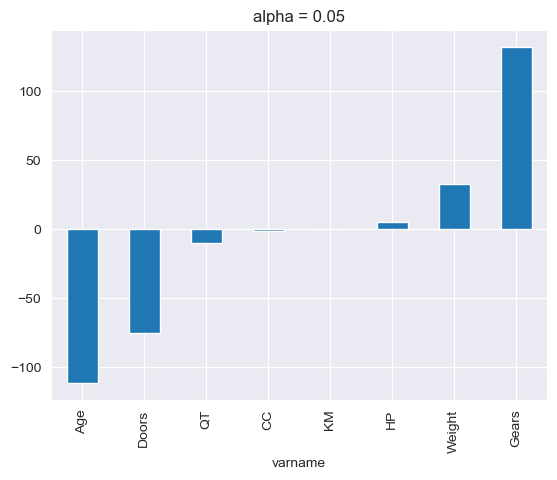

In [141]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05');

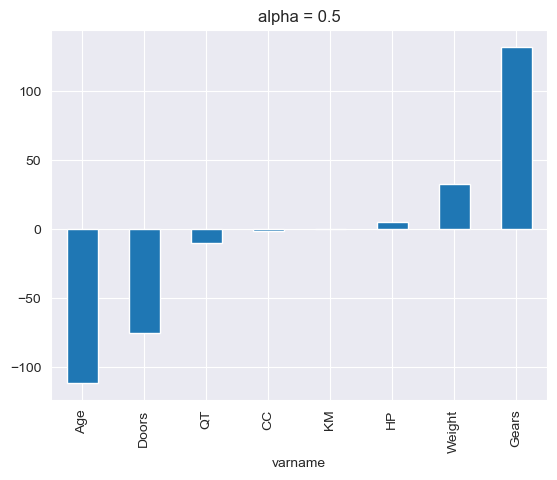

In [142]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5');

In [143]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [144]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.8868613507163354
R2_score (train):  0.920892824744604
R2_score (test):  0.8991355999668053
RMSE:  982.0879734916061


In [145]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [146]:
sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [147]:
sel_lasso.get_support()

array([ True,  True,  True,  True, False, False,  True,  True])

In [148]:
# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))

total features: 8
selected features: 6
features with coefficients shrank to zero: 2


In [149]:
x_train.columns[(sel_lasso.get_support())]

Index(['Age', 'KM', 'HP', 'CC', 'QT', 'Weight'], dtype='object')

## Model Validation

Comparing different models with respect to their Root Mean Squared Errors

In [168]:
x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
Price = y
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model_1.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  0.9001980293966753
R2_Adjusted_score :  0.8996695772073989
RMSE :  973.4891302577998


In [151]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['Age','Weight','KM','HP','CC','Doors']]))

In [152]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [153]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

Raw Model= 976.7658733249549 
After Removing Influencers= 975.9271399262799 
After Log Transformation on both Model= 1795.826559209863 
After Cube-root Transformation on both Model= 1152.557794874252 
After Sqaure Root Transformation on both Model= 1010.8979447569421 
After Removing Influencers from model 975.9271399262799 
Final Model without Multicollinearity Model= 6012.984866656378


## Let's compare the Root Mean Squared Error and check for the minimum value

In [154]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'After Removing Influencers'

# Observation: The Model that was build without Multicollinearity Issue and using Standard Scaler Transformation performed very well.
## Scoring minimumn Root mean squared error and a good R-squared and adjusted R-squared
## Note: We are going to rebuild the model by using that model

In [155]:
Final_model = smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight", data = x).fit()
# Finding rsquared values
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.117e+26
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:49:04   Log-Likelihood:                 35644.
No. Observations:                1330   AIC:                        -7.127e+04
Df Residuals:                    1322   BIC:                        -7.123e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2115   7.53e-13  -4.26e+12      0.000      -3.211      -3.211
Age            0.0563   1.25e-15   4.53e+13      0.000       0.056       0.056
KM         -6.138e-19   5.94e-19     -1.033      0.302   -1.78e-18    5.52e-19
HP          1.229e-16   1.71e-15      0.072      0.943   -3.22e-15    3.47e-15
CC         -2.415e-17   1.66e-16     -0.146      0.884   -3.49e-16    3.01e-16
Doors      -1.425e-14   1.81e-14     -0.786      0.432   -4.98e-14    2.13e-14
QT          3.524e-17   9.27e-16      0.038      0.970   -1.78e-15    1.85e-15
Weight      6.061e-17   8.25e-16      0.073      0.941   -1.56e-15    1.68e-15
==============================================================================
Omnibus:                      117.679   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.720
Skew:                           0.822   Prob(JB):                     3.08e-33
Kurtosis:                       2.980   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

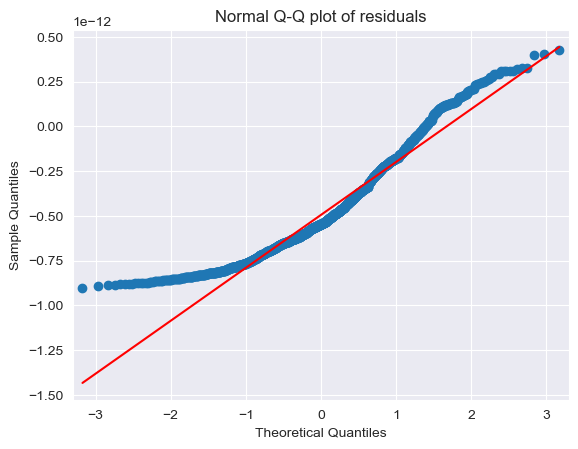

In [156]:
#Residuals values  = y - yhat
import statsmodels.api as sm
sm.qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

^Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
# Residual Plot for Homoscedasticity

In [157]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

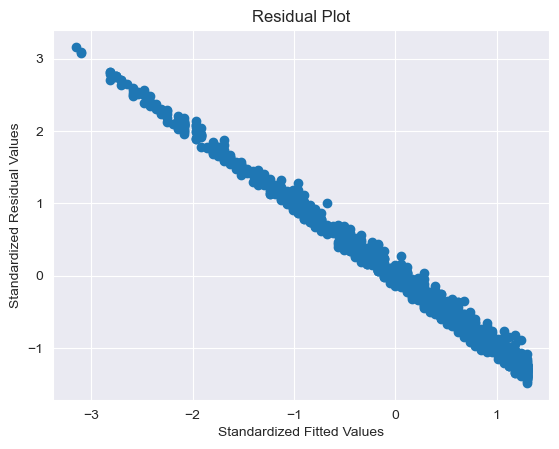

In [158]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

^Observation: Constant Variance (Homoscedasticity) in Error
# Residual VS Regressors
## Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

eval_env: 1


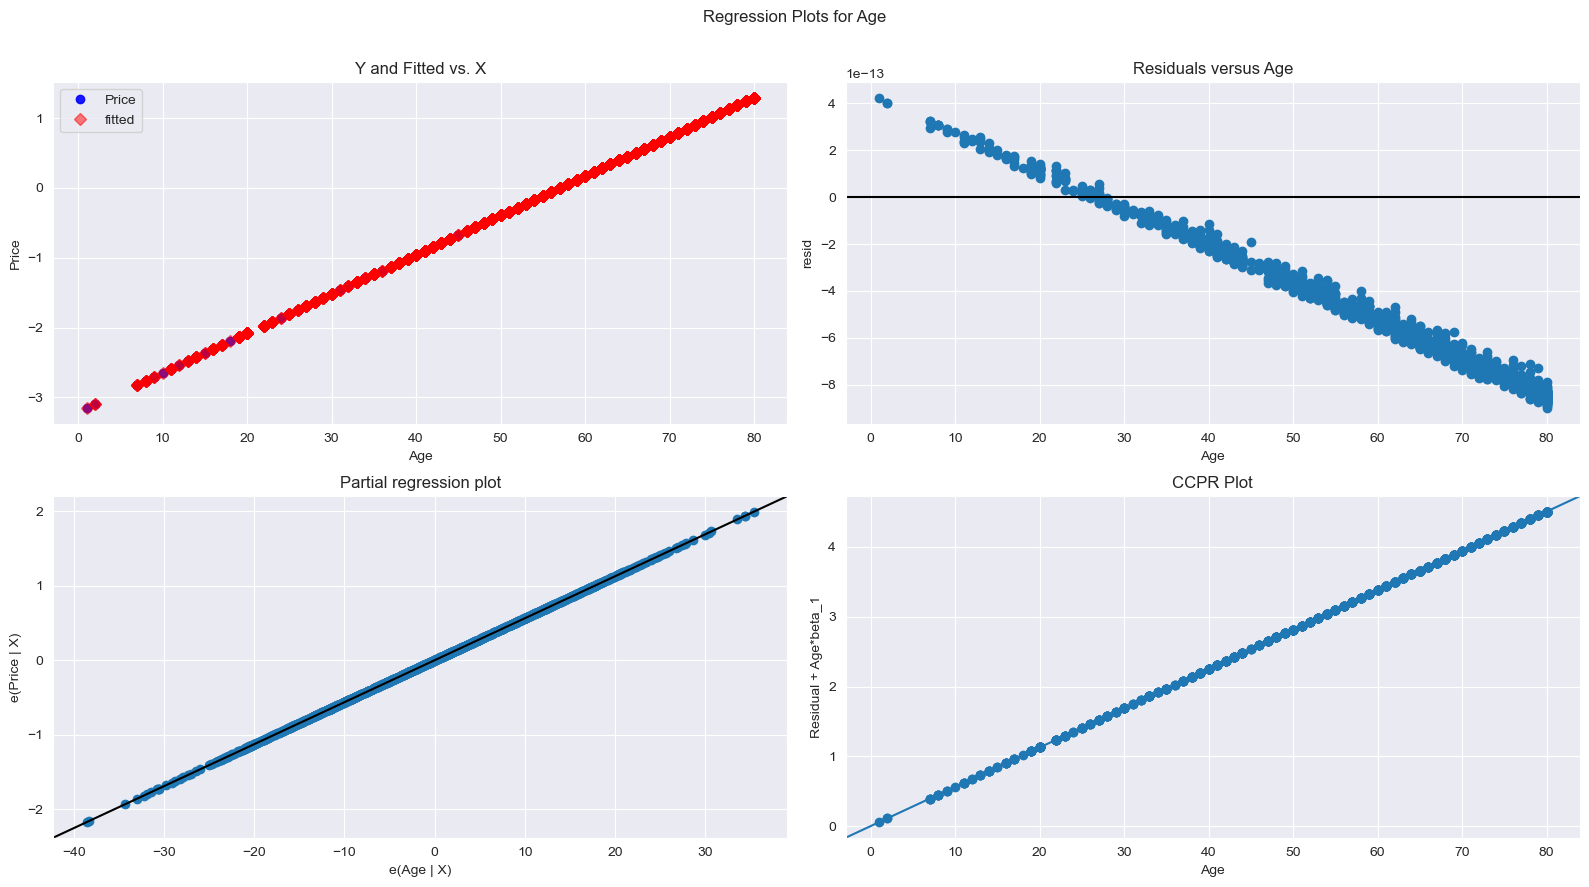

In [159]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

eval_env: 1


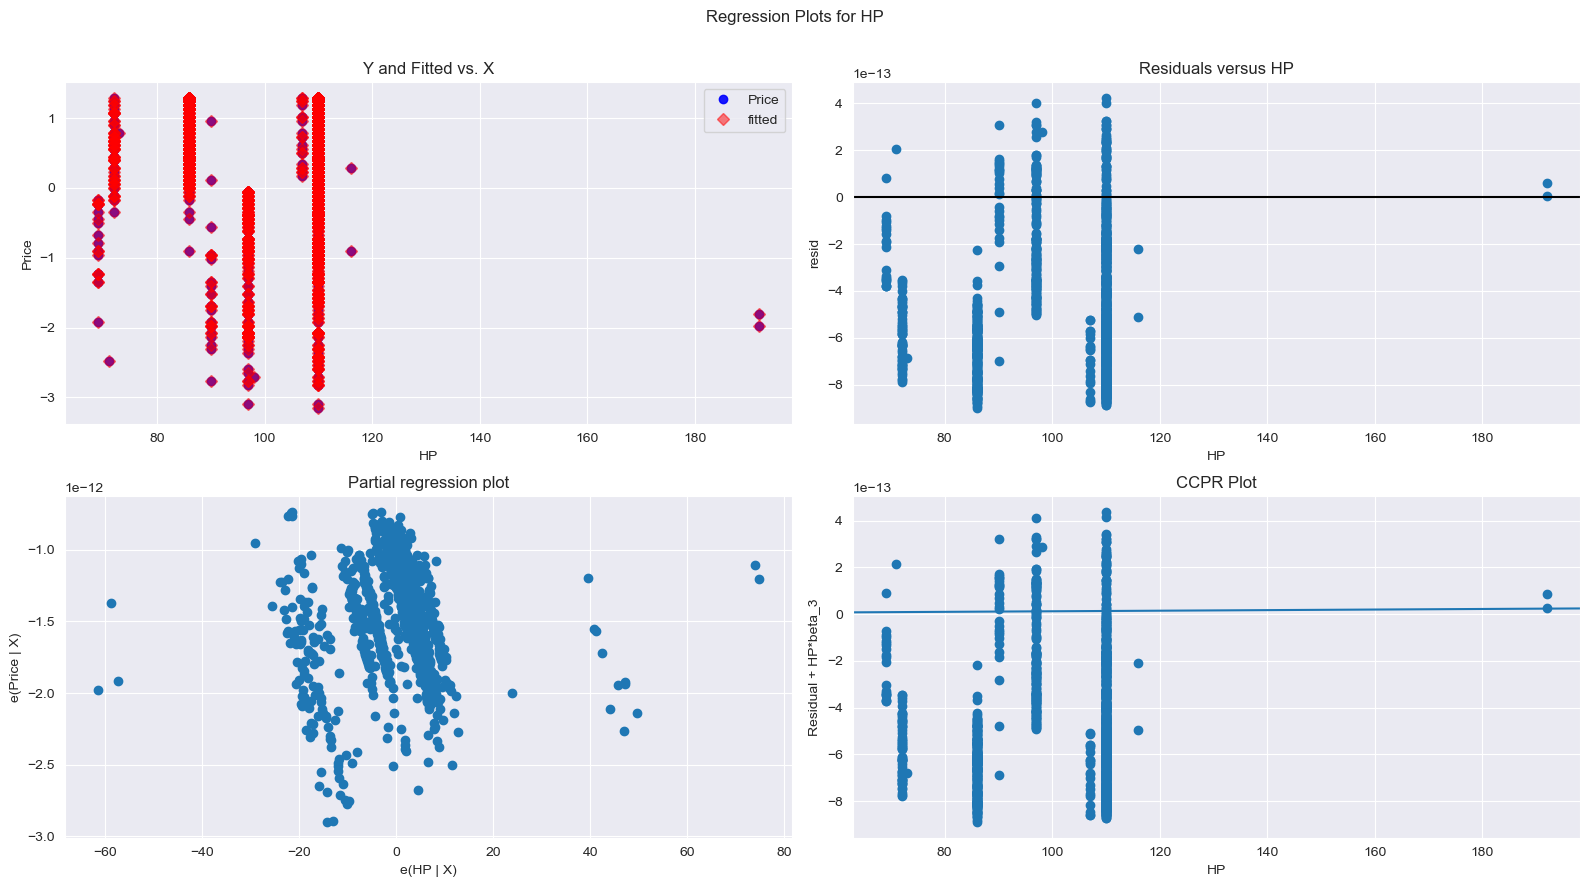

In [160]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

eval_env: 1


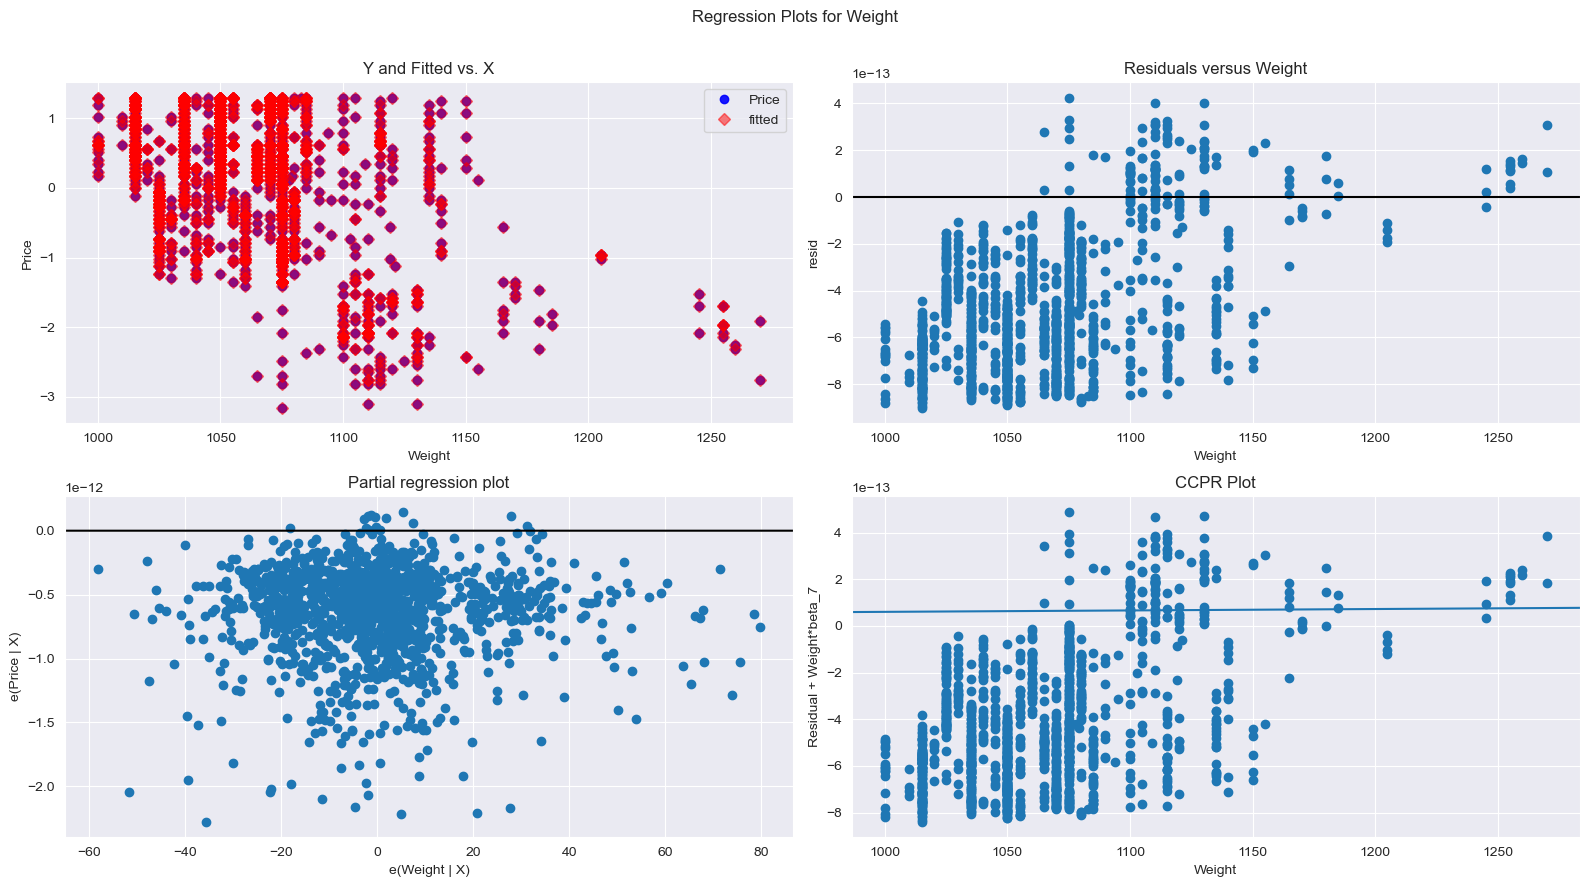

In [161]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

eval_env: 1


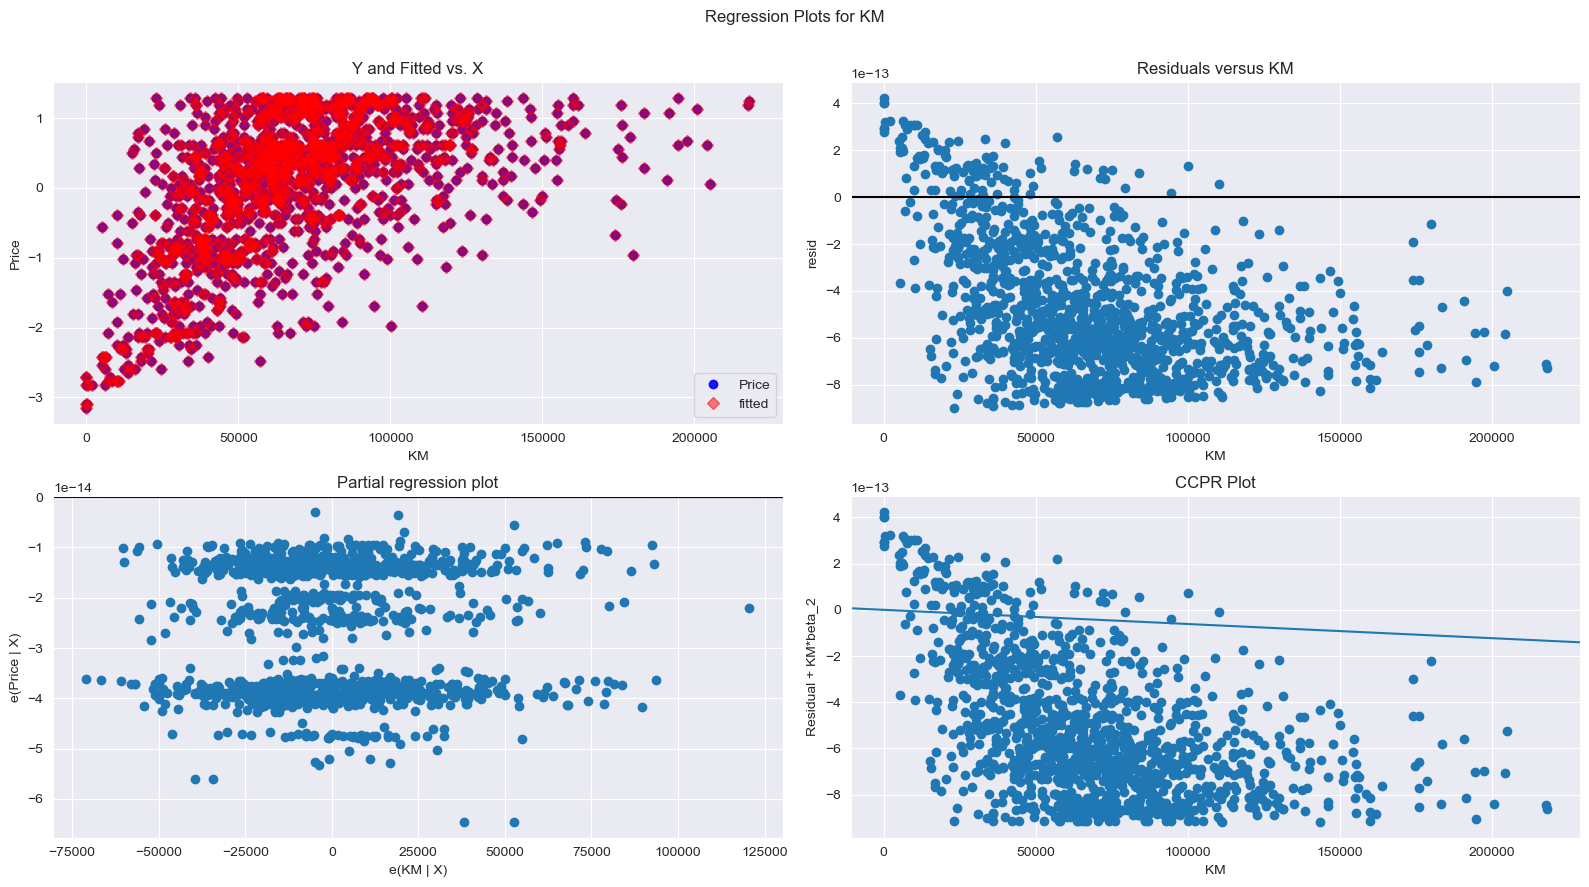

In [162]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

eval_env: 1


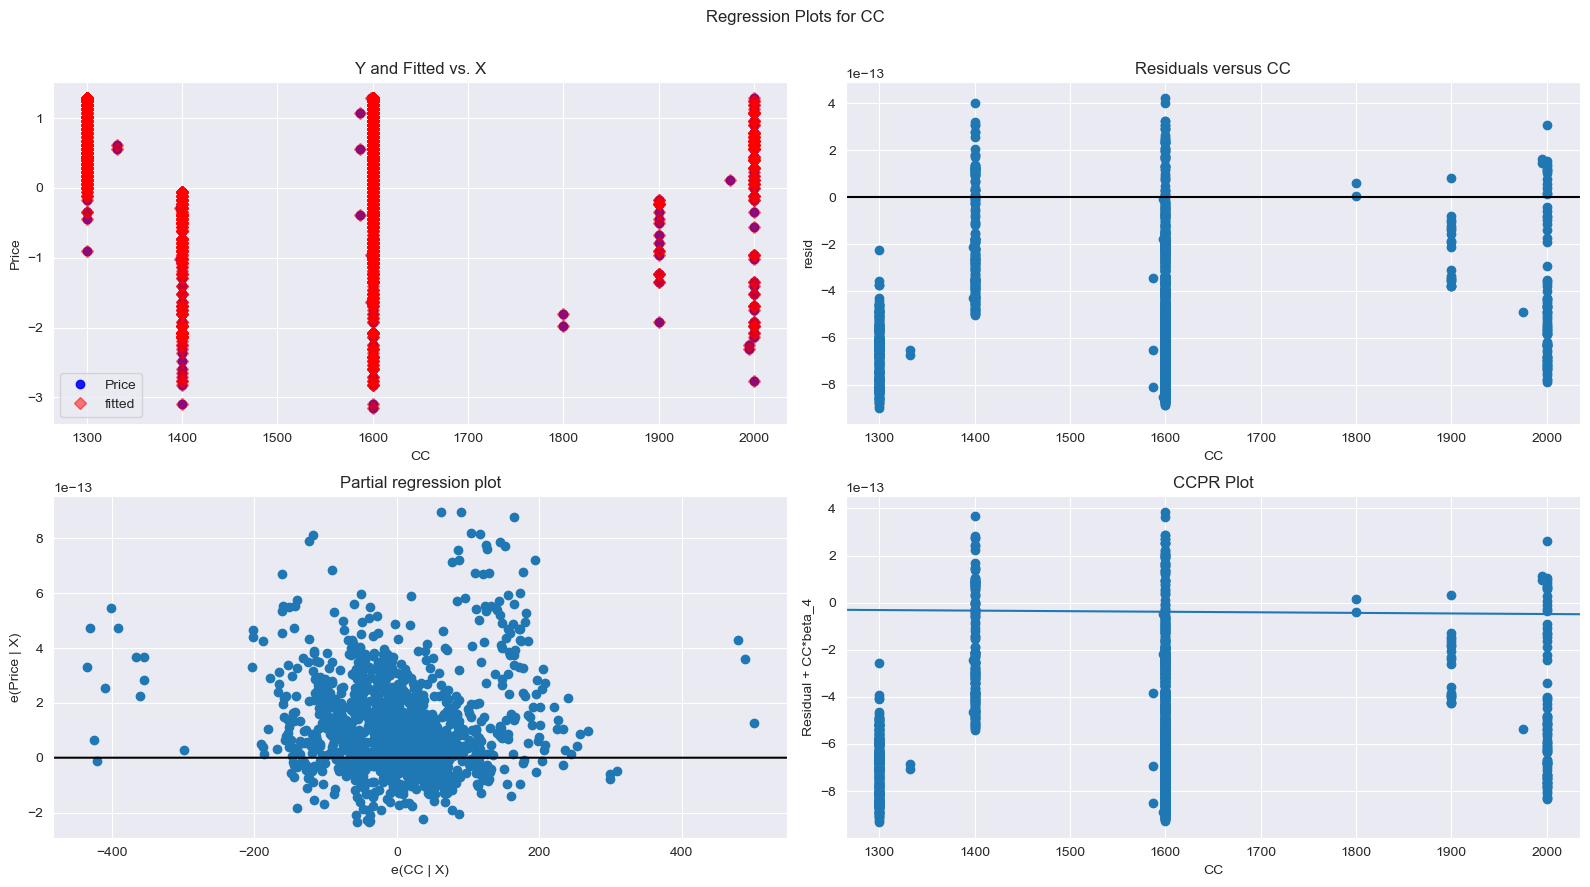

In [163]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

eval_env: 1


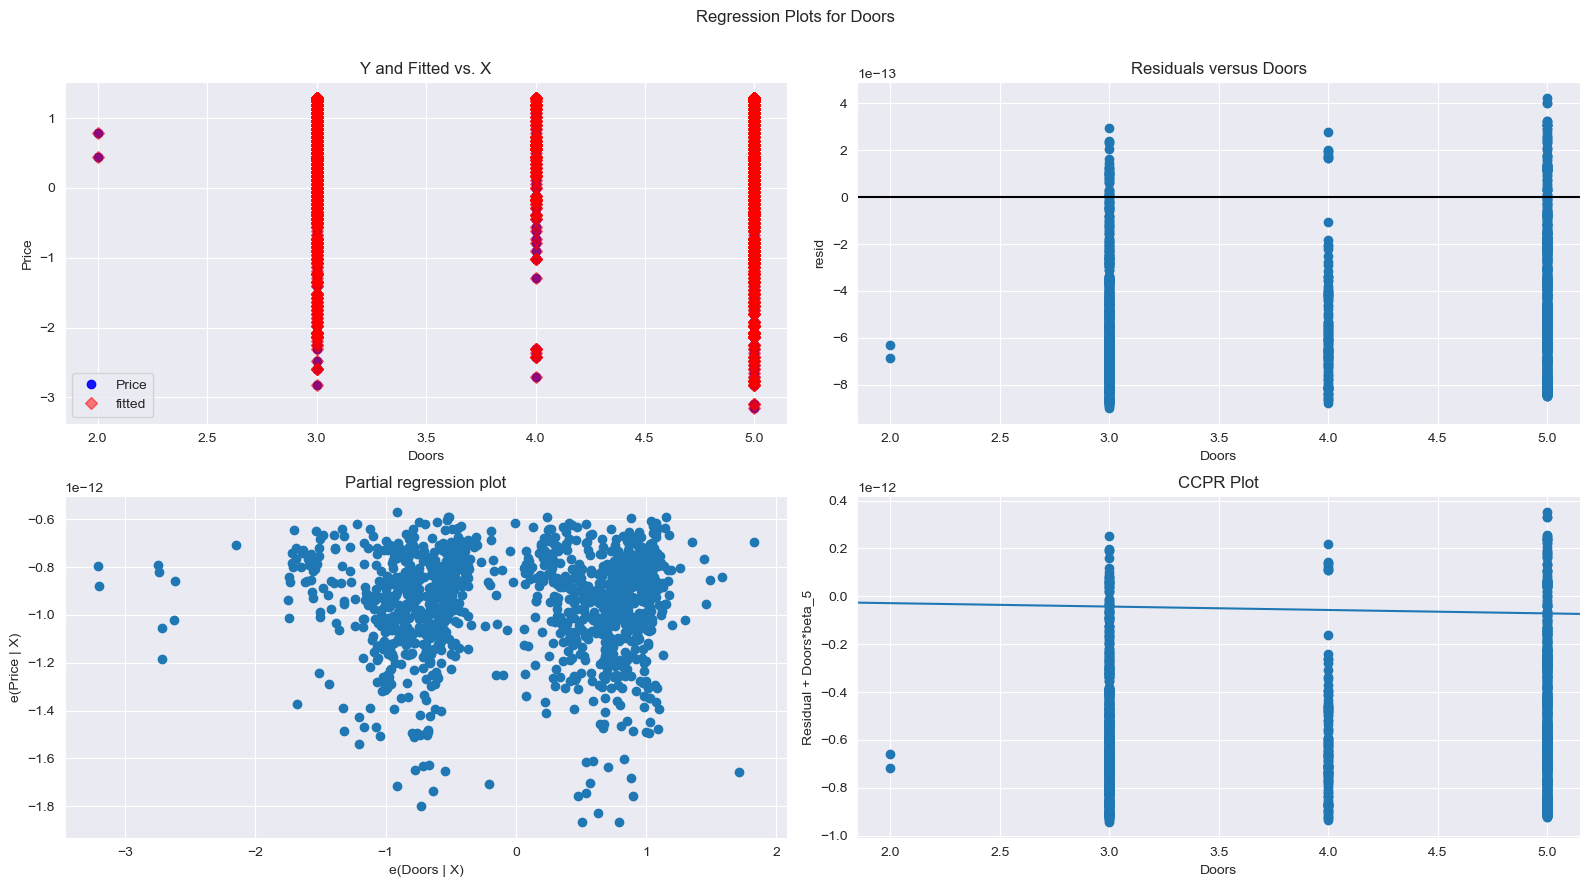

In [164]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

# Observation:
Some of the feature doesn't suggest linear relationship with the Dependent feature like Gears, QT, CC, Doors, Weight and HP
Only KM and Age is having a linear relation with the Price Feature
# Predicting values from Model using same dataset

In [165]:
x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[262.68919298],
       [292.04034547],
       [331.17521544],
       ...,
       [742.09135021],
       [732.30763272],
       [722.52391522]])

In [166]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

10412.841934834876

In [167]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['QT'] = dataframe.QT
predicted['Doors'] = dataframe.Doors
predicted

,Predicted_Price,Price,Age,KM,Weight,HP,CC,QT,Doors
0,262.689193,13750,23,72937,1165,90,2000,210,3
1,292.040345,14950,26,48000,1165,90,2000,210,3
2,331.175215,13750,30,38500,1170,90,2000,210,3
3,350.742650,12950,32,61000,1170,90,2000,210,3
4,301.824063,16900,27,94612,1245,90,2000,210,3
...,...,...,...,...,...,...,...,...,...
1325,820.361090,8450,80,23000,1015,86,1300,69,3
1326,712.740198,7500,69,20544,1025,86,1300,69,3
1327,742.091350,10845,72,19000,1015,86,1300,69,3
1328,732.307633,8500,71,17016,1015,86,1300,69,3
